# Comparing different datasets

Datasets:

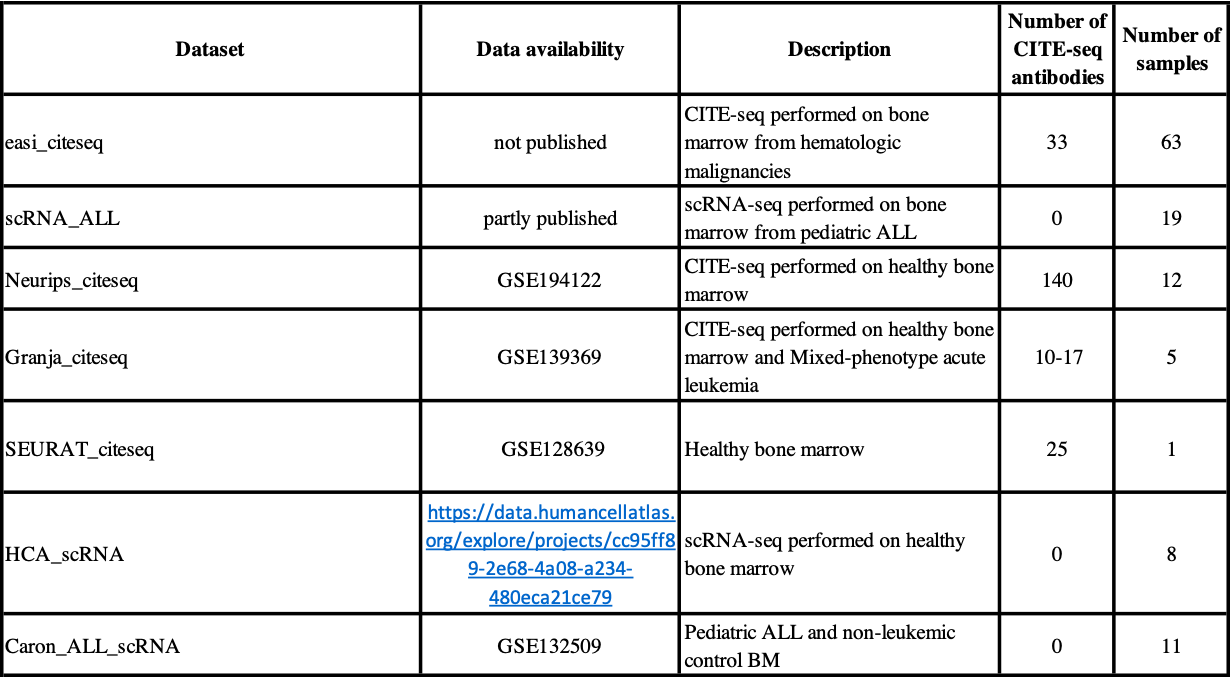

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



In [8]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')


## Caron

In [53]:
adata_caron=adata[adata.obs['SAMPLE_SET'] == 'Caron' ]

adata_caron

View of AnnData object with n_obs × n_vars = 42893 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [54]:
adata_caron.obs['DIAGNOSIS'] 

AAACCTGCAATAAGCA-1-1     healthy
AAACCTGGTGATGTCT-1-1     healthy
AAACCTGTCAGTGCAT-1-1     healthy
AAACGGGCAATGAATG-1-1     healthy
AAACGGGCATCGGTTA-1-1     healthy
                          ...   
TTTGTCAGTCATGCAT-1-17      T-ALL
TTTGTCAGTGCTTCTC-1-17      T-ALL
TTTGTCAGTGGACGAT-1-17      T-ALL
TTTGTCATCAACGAAA-1-17      T-ALL
TTTGTCATCTAACTGG-1-17      T-ALL
Name: DIAGNOSIS, Length: 42893, dtype: category
Categories (3, object): ['B-ALL', 'T-ALL', 'healthy']

In [55]:
#Select only all B-ALL cases

caron_ball=adata_caron[adata_caron.obs['DIAGNOSIS'] == 'B-ALL' ]

In [56]:
caron_ball.obs['DIAGNOSIS']

AAACCTGAGACTTTCG-1-10    B-ALL
AAACCTGGTCTTCAAG-1-10    B-ALL
AAACCTGGTGTTGAGG-1-10    B-ALL
AAACCTGTCCCAAGTA-1-10    B-ALL
AAACCTGTCGAATGCT-1-10    B-ALL
                         ...  
TTTGTCAGTTACAGAA-1-15    B-ALL
TTTGTCATCACGGTTA-1-15    B-ALL
TTTGTCATCAGTGTTG-1-15    B-ALL
TTTGTCATCCTTTCGG-1-15    B-ALL
TTTGTCATCTATGTGG-1-15    B-ALL
Name: DIAGNOSIS, Length: 27182, dtype: category
Categories (1, object): ['B-ALL']

## Neurips (?)

In [29]:
#Neurips? 

adata_n=adata[adata.obs['SAMPLE_SET'] == 'N' ]

adata_n

View of AnnData object with n_obs × n_vars = 80998 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [36]:
adata_n.obs['DIAGNOSIS'] 

GTAGTACCAATCCTTT-1-s4d1    healthy
CTCAAGAGTCACAGAG-1-s4d1    healthy
CTGTGGGTCATGCGGC-1-s4d1    healthy
CGTGATAGTTATCTGG-1-s4d1    healthy
AGATCCAAGATCGGTG-1-s4d1    healthy
                            ...   
GTGGTTAGTCGAGTTT-1-s1d3    healthy
GCTACAACAGTGCGCT-1-s1d3    healthy
AACAAAGGTTGGTACT-1-s1d3    healthy
TGACAGTCATGGCTGC-1-s1d3    healthy
CTGGCAGGTCTCACGG-1-s1d3    healthy
Name: DIAGNOSIS, Length: 80998, dtype: category
Categories (1, object): ['healthy']

## "A"

In [49]:
#

adata_a=adata[adata.obs['SAMPLE_SET'] == 'A' ]

adata_a

View of AnnData object with n_obs × n_vars = 18386 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [38]:
adata_a.obs['DIAGNOSIS'] 

AAACCTGAGCACCGTC-1-110    B-ALL
AAACCTGAGGCCCTCA-1-110    B-ALL
AAACCTGAGTGCAAGC-1-110    B-ALL
AAACCTGCACAACTGT-1-110    B-ALL
AAACCTGGTATATCCG-1-110    B-ALL
                          ...  
TTTACTGTCGGAAACG-1-134    B-ALL
TTTATGCAGAGGTTAT-1-134    B-ALL
TTTGCGCCAGTTCCCT-1-134    B-ALL
TTTGTCAGTTCGGCAC-1-134    B-ALL
TTTGTCATCGTAGGAG-1-134    B-ALL
Name: DIAGNOSIS, Length: 18386, dtype: category
Categories (1, object): ['B-ALL']

## Granja

In [31]:
#
adata_granja=adata[adata.obs['SAMPLE_SET'] == 'Granja' ]

adata_granja

View of AnnData object with n_obs × n_vars = 24204 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [39]:
adata_granja.obs['DIAGNOSIS'] 

BMMC_D1T1:AAACCCAAGATGCAGC-1    healthy
BMMC_D1T1:AAACCCACAAACTCGT-1    healthy
BMMC_D1T1:AAACCCACAGTGTACT-1    healthy
BMMC_D1T1:AAACCCATCGCTATTT-1    healthy
BMMC_D1T1:AAACGAACACCCAATA-1    healthy
                                 ...   
MPAL5_T1:TTTGTCAAGCGTGAGT-1        MPAL
MPAL5_T1:TTTGTCACACGTCAGC-1        MPAL
MPAL5_T1:TTTGTCACATCGTCGG-1        MPAL
MPAL5_T1:TTTGTCACATTTCACT-1        MPAL
MPAL5_T1:TTTGTCATCGTAGGAG-1        MPAL
Name: DIAGNOSIS, Length: 24204, dtype: category
Categories (2, object): ['MPAL', 'healthy']

## Easigenomics

In [32]:
#
adata_f=adata[adata.obs['SAMPLE_SET'] == 'F' ]

adata_f

View of AnnData object with n_obs × n_vars = 102954 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [40]:
adata_f.obs['DIAGNOSIS'] 

AAACCTGAGCCCTAAT-1-100    Aplastic anemia
AAACCTGCAAGCCGCT-1-100    Aplastic anemia
AAACCTGCACTGTCGG-1-100    Aplastic anemia
AAACCTGCAGACGCTC-1-100    Aplastic anemia
AAACCTGTCCTTAATC-1-100    Aplastic anemia
                               ...       
TTTGTCAGTACATCCA-1-158              B-ALL
TTTGTCAGTAGGCATG-1-158              B-ALL
TTTGTCAGTATGCTTG-1-158              B-ALL
TTTGTCATCAAACCAC-1-158              B-ALL
TTTGTCATCCATGAAC-1-158              B-ALL
Name: DIAGNOSIS, Length: 102954, dtype: category
Categories (10, object): ['AML', 'Aplastic anemia', 'B-ALL', 'Blastic plasmacytoid dendritic cell leukemia', ..., 'Multiple myeloma', 'Plasma cell leukemia', 'RAEB-2', 'T-ALL']

In [57]:
easi_ball=adata_f[adata_f.obs['DIAGNOSIS'] == 'B-ALL' ]

In [58]:
easi_ball

View of AnnData object with n_obs × n_vars = 10351 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

## Seurat (?)

In [33]:
#Seurat?

adata_s=adata[adata.obs['SAMPLE_SET'] == 'S' ]

adata_s

View of AnnData object with n_obs × n_vars = 29556 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [41]:
adata_s.obs['DIAGNOSIS'] 

a_AAACCTGAGCTTATCG-1    healthy
a_AAACCTGAGGTGGGTT-1    healthy
a_AAACCTGAGTACATGA-1    healthy
a_AAACCTGCAAACCTAC-1    healthy
a_AAACCTGCAAGGTGTG-1    healthy
                         ...   
b_TTTGTCATCCGAGCCA-1    healthy
b_TTTGTCATCCGTAGGC-1    healthy
b_TTTGTCATCCTCGCAT-1    healthy
b_TTTGTCATCGCCGTGA-1    healthy
b_TTTGTCATCGTTTGCC-1    healthy
Name: DIAGNOSIS, Length: 29556, dtype: category
Categories (1, object): ['healthy']

## B-ALL comparisons between datasets (A, easigenomics)

In [ ]:
#caron_ball (doed not include protein data)
#easi_ball
#adata_a

In [67]:
prot_easi=easi_ball.obsm['protein_expression']

prot_easi.shape

(10351, 141)

In [63]:
prot_a=adata_a.obsm['protein_expression']

In [68]:
prot_a.shape

(18386, 141)

In [70]:
#To exclude columns that contain only zeros


prot_a = pd.DataFrame(prot_a)
prot_a != 0
(prot_a != 0).any(axis=0)
prot_a.loc[:, (prot_a != 0).any(axis=0)]
prot_a = prot_a.loc[:, (prot_a != 0).any(axis=0)]

for col in prot_a:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


In [71]:
#To exclude columns that contain only zeros from easigenomics data

prot_easi= pd.DataFrame(prot_easi)
prot_easi != 0
(prot_easi != 0).any(axis=0)
prot_easi.loc[:, (prot_easi != 0).any(axis=0)]
prot_easi = prot_easi.loc[:, (prot_easi != 0).any(axis=0)]

for col in prot_easi:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


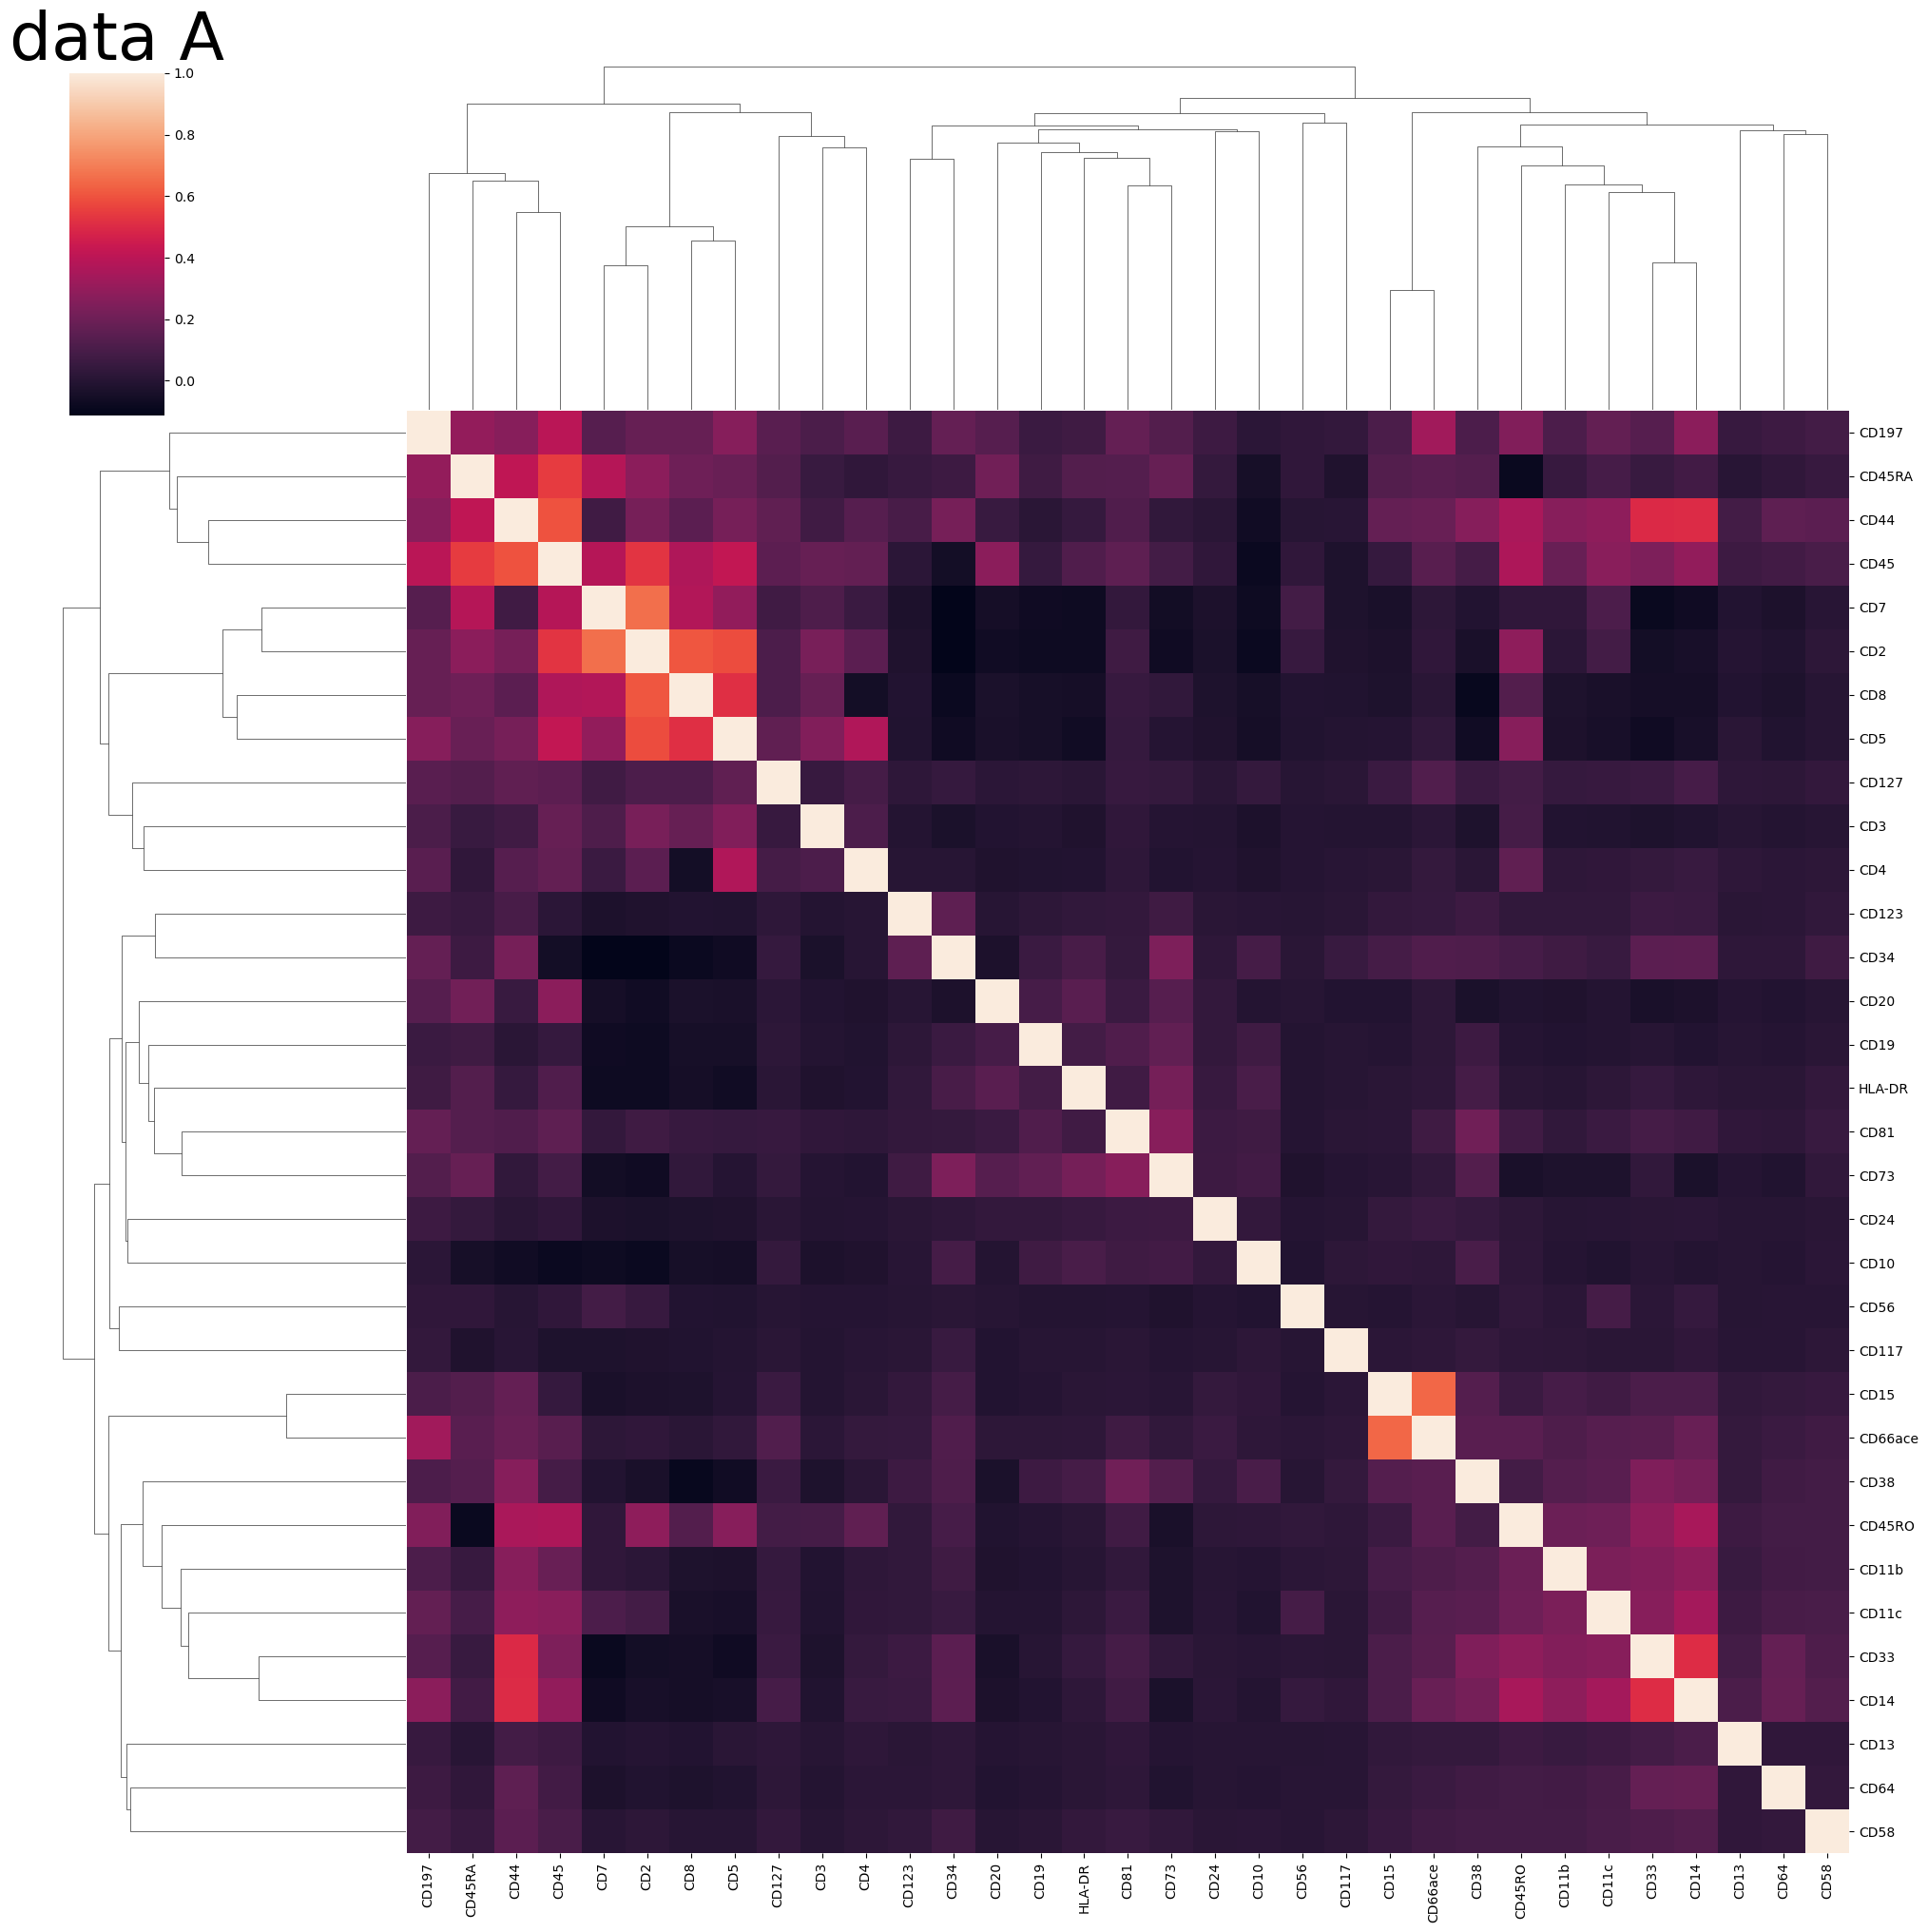

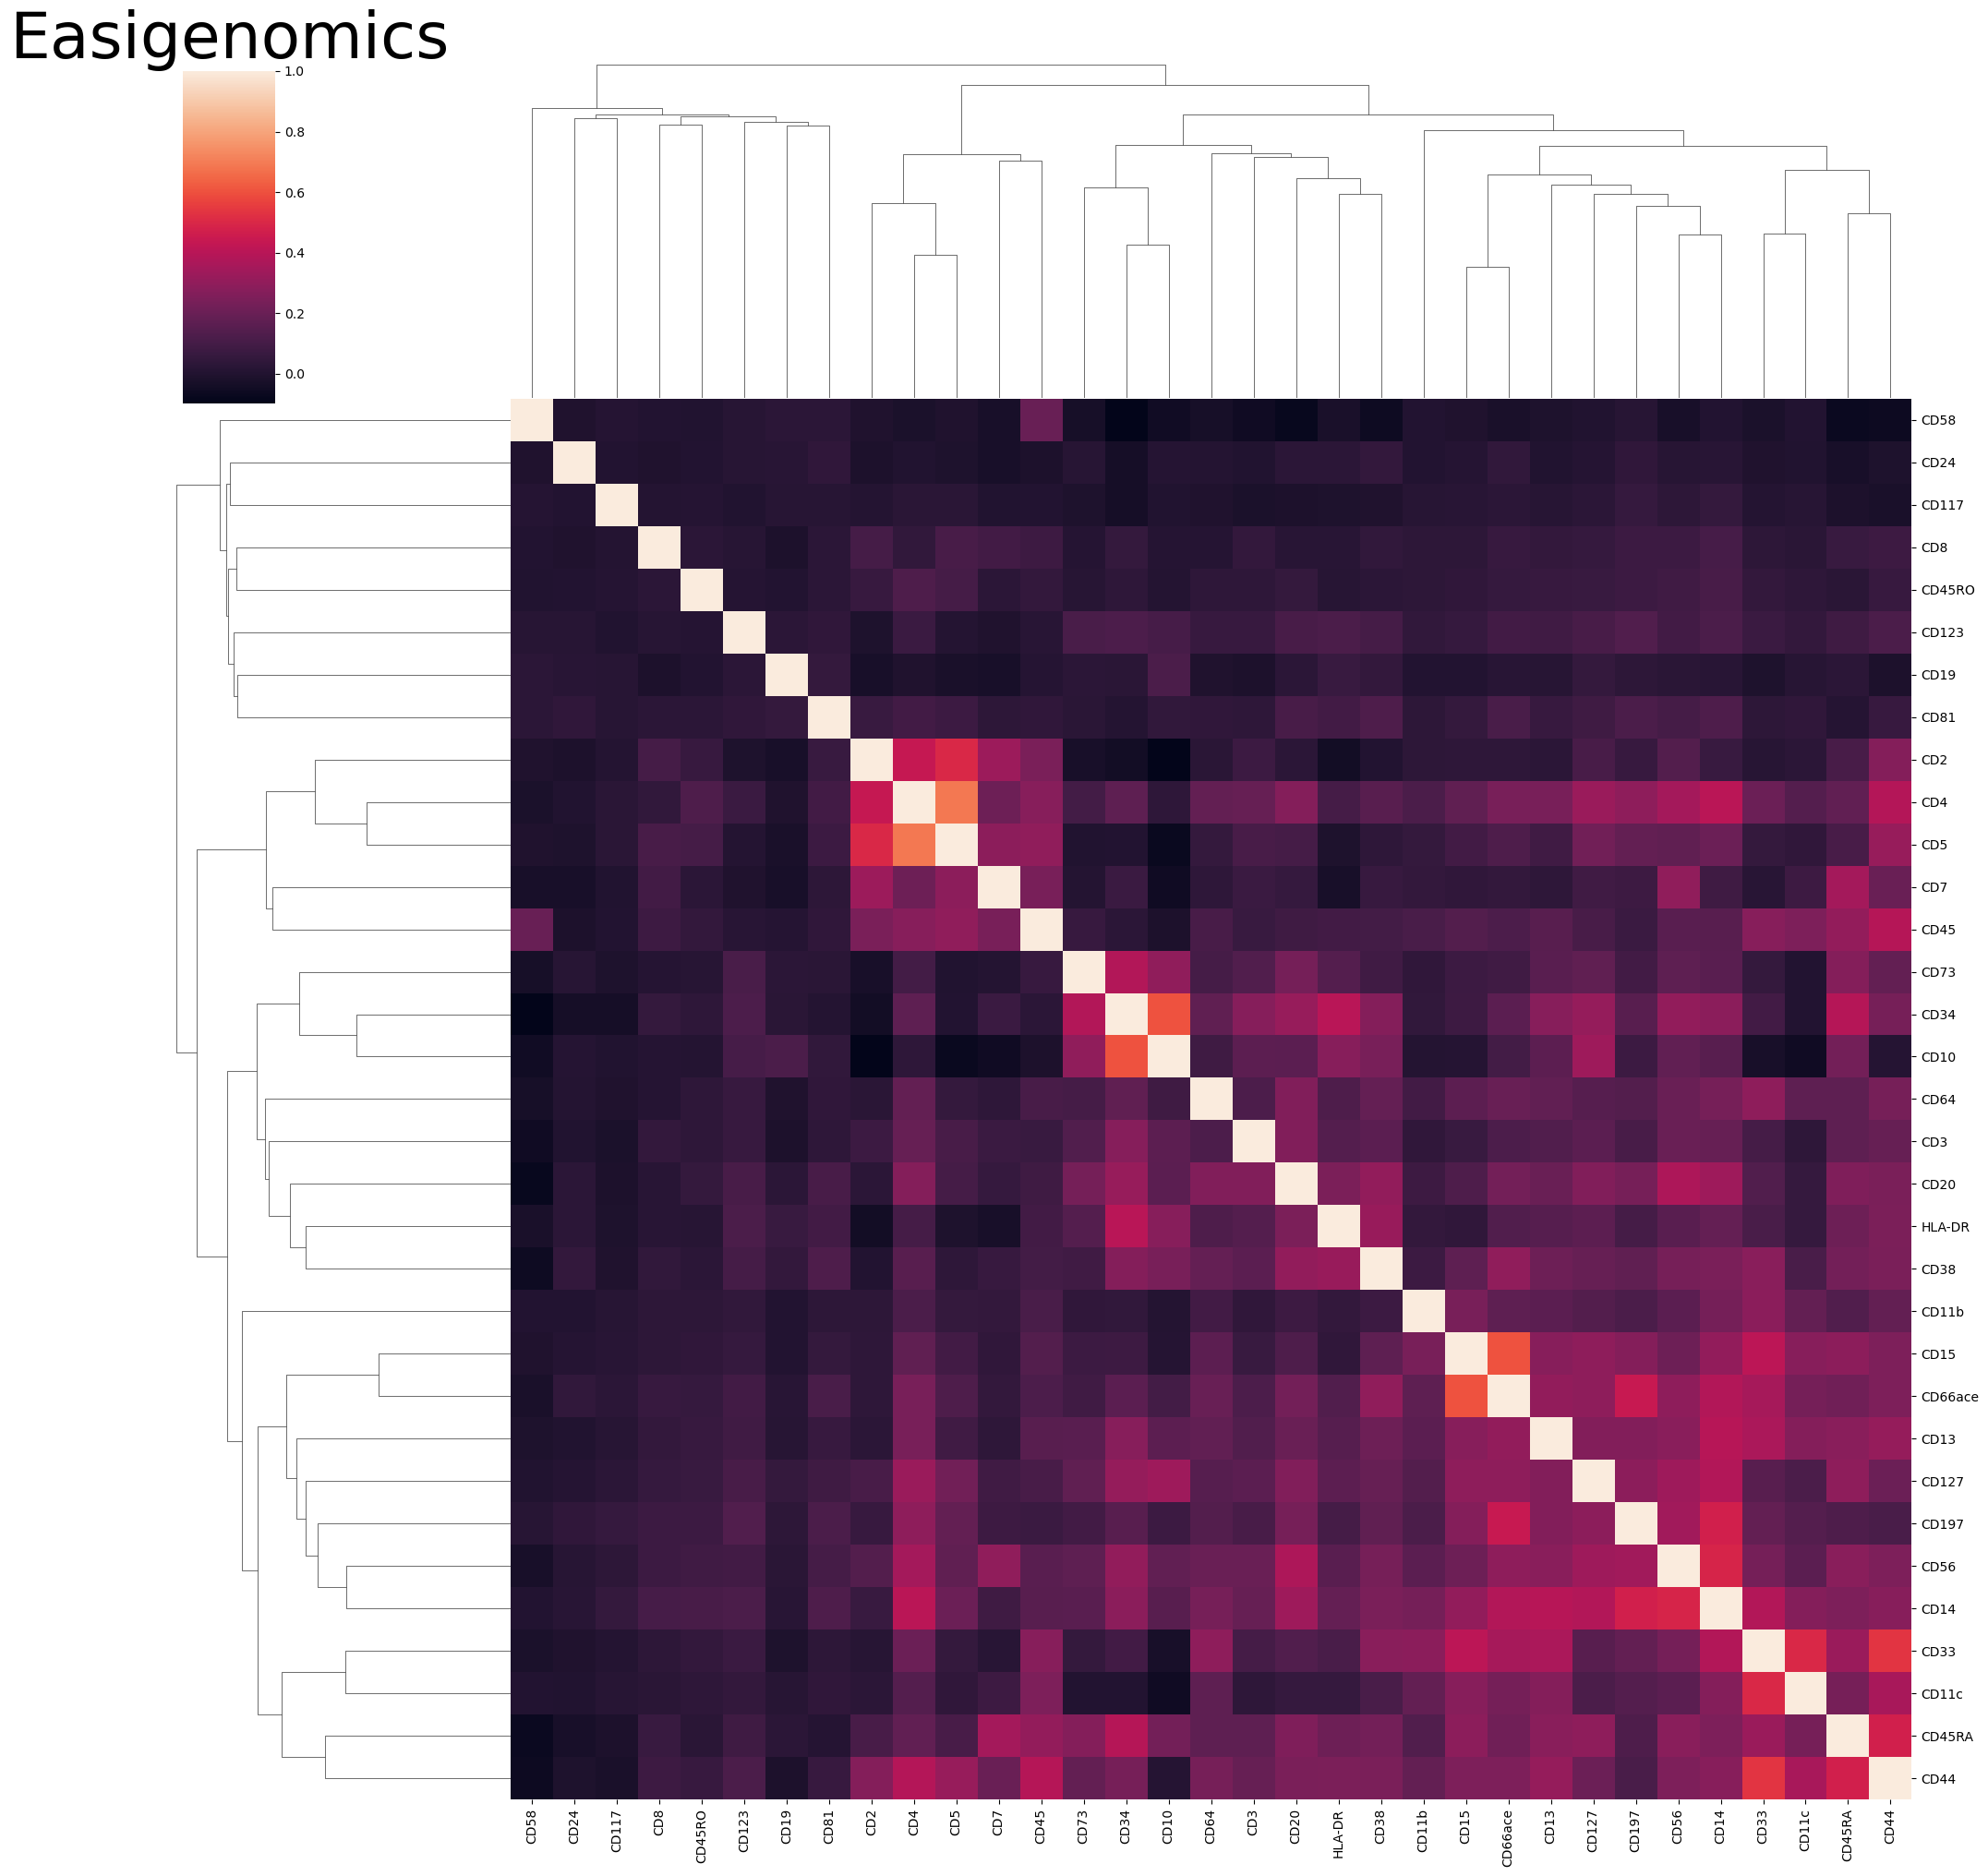

In [110]:
#Easigenomics


matrix_prot=prot_a.corr(method='pearson', min_periods=1)
sns.clustermap(matrix_prot2, figsize=(20,20))
plt.title('data A', fontsize = 50)

matrix_prot2=prot_easi.corr(method='pearson', min_periods=1)
sns.clustermap(matrix_prot2, figsize=(20,20))
plt.title('Easigenomics', fontsize = 50) ;



### Comments: 

Data a:
- Cluster 1: CD45 (HSC), T:cell markers: CD7, CD2, CD8, CD5
- Cluster 2: T:cell markers? CD197, CD45RA, CD45, CD44
- CLuster 3 (?): CD15 (myeloid), CD38 (early B) , CD66ace (neutrophils), CD45RO (memory T), CD11b, CD11c, CD33 (myeloid), CD14 (myeloid)

CD10 missing? This dataset also includes samples taken after starting treatment? 

Easigenomics:
- Cluster 1: T-cell markers: CD2, CD4, CD5, CD7 
- Cluster 2: CD73 (?), early B: CD34, CD10
- or Cluster 3: early B: CD34, CD10, CD38, CD64 (myeloid), CD3 (T), CD20 (B), HLA-DR (B)

In [74]:
#sorting by mean dataset A

index_sort = prot_a.mean().sort_values().index
df_sorted = prot_a[index_sort]

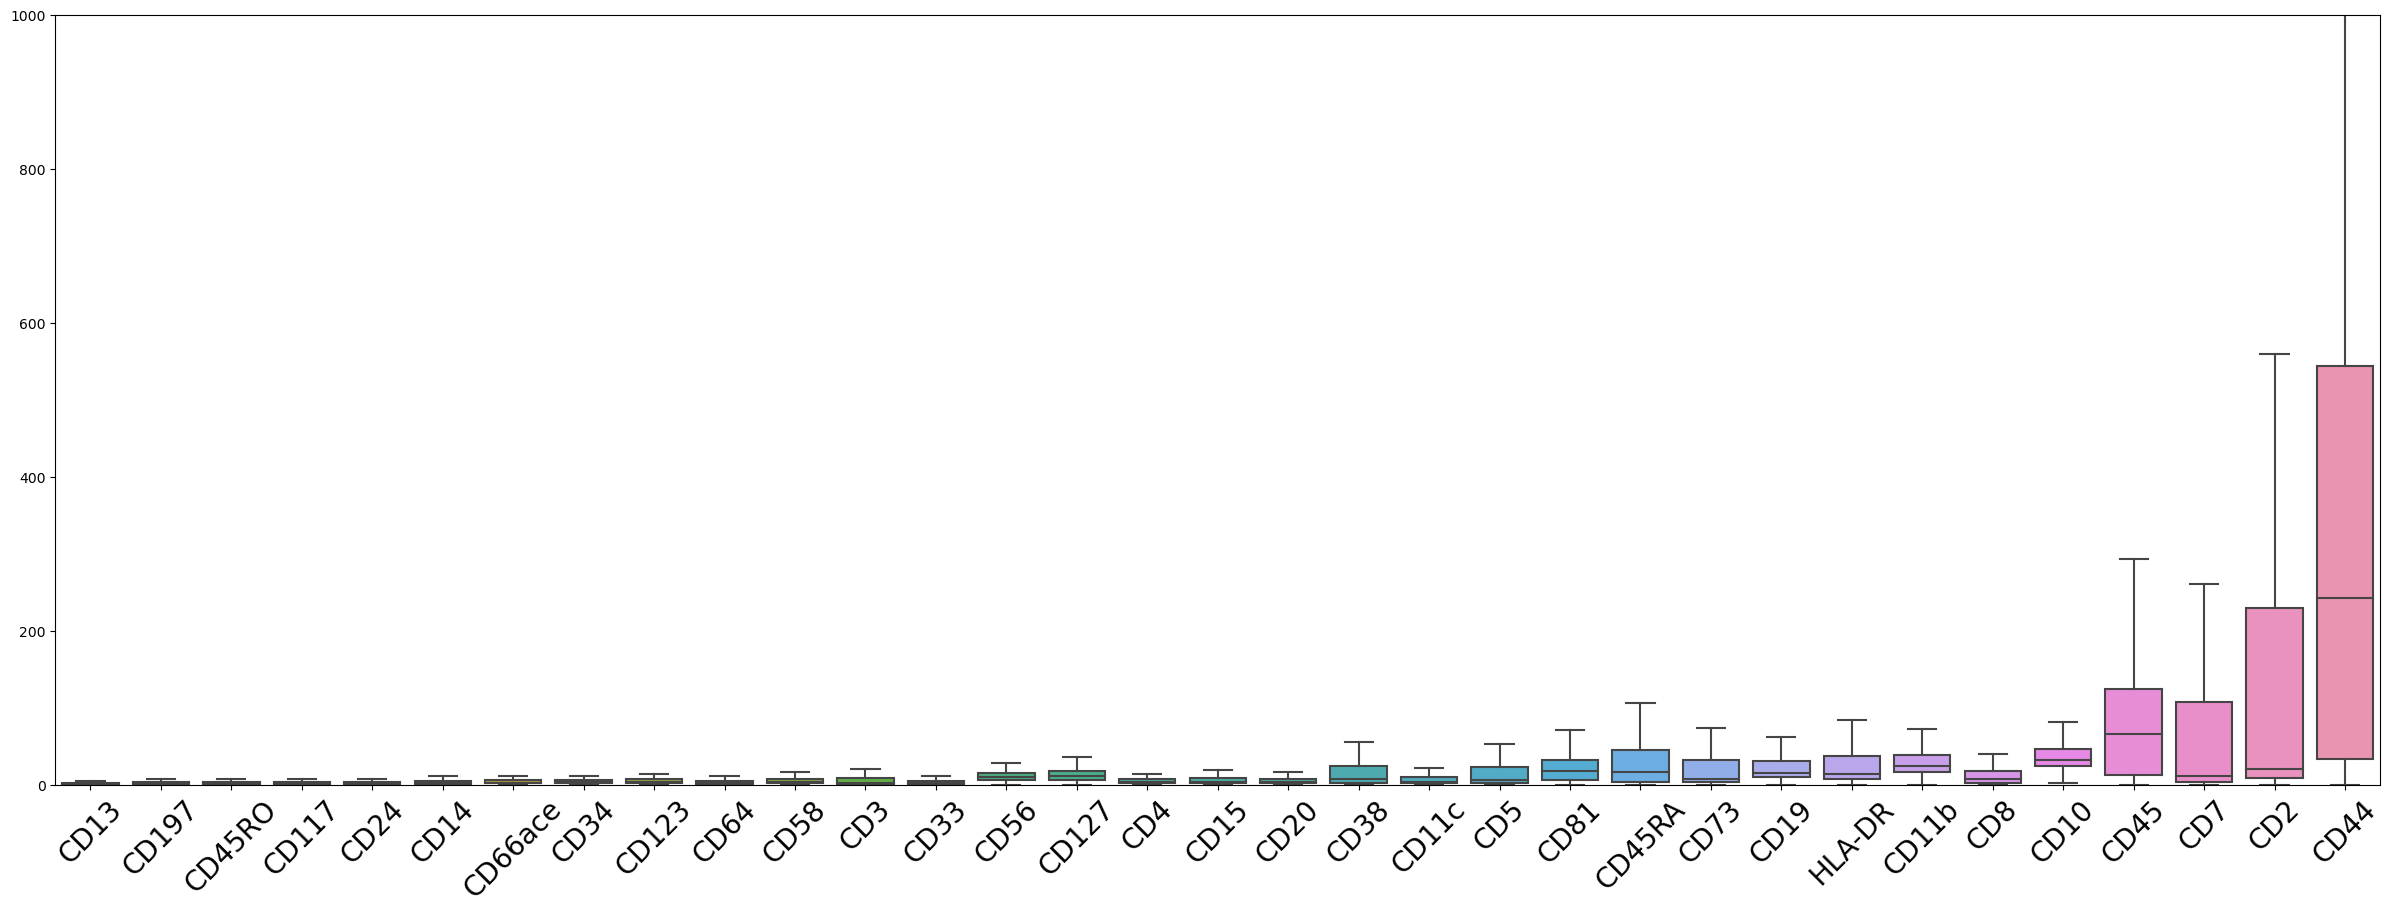

In [79]:
plt.figure(figsize=(30,10))
plt.ylim(0, 1000)
d=sns.boxplot(data=df_sorted,  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) #rotation

d.tick_params(axis='x', labelsize=20) #increased font

In [80]:
#sorting by mean easi dataset

index_sort2 = prot_easi.mean().sort_values().index
df_sorted2 = prot_easi[index_sort2]


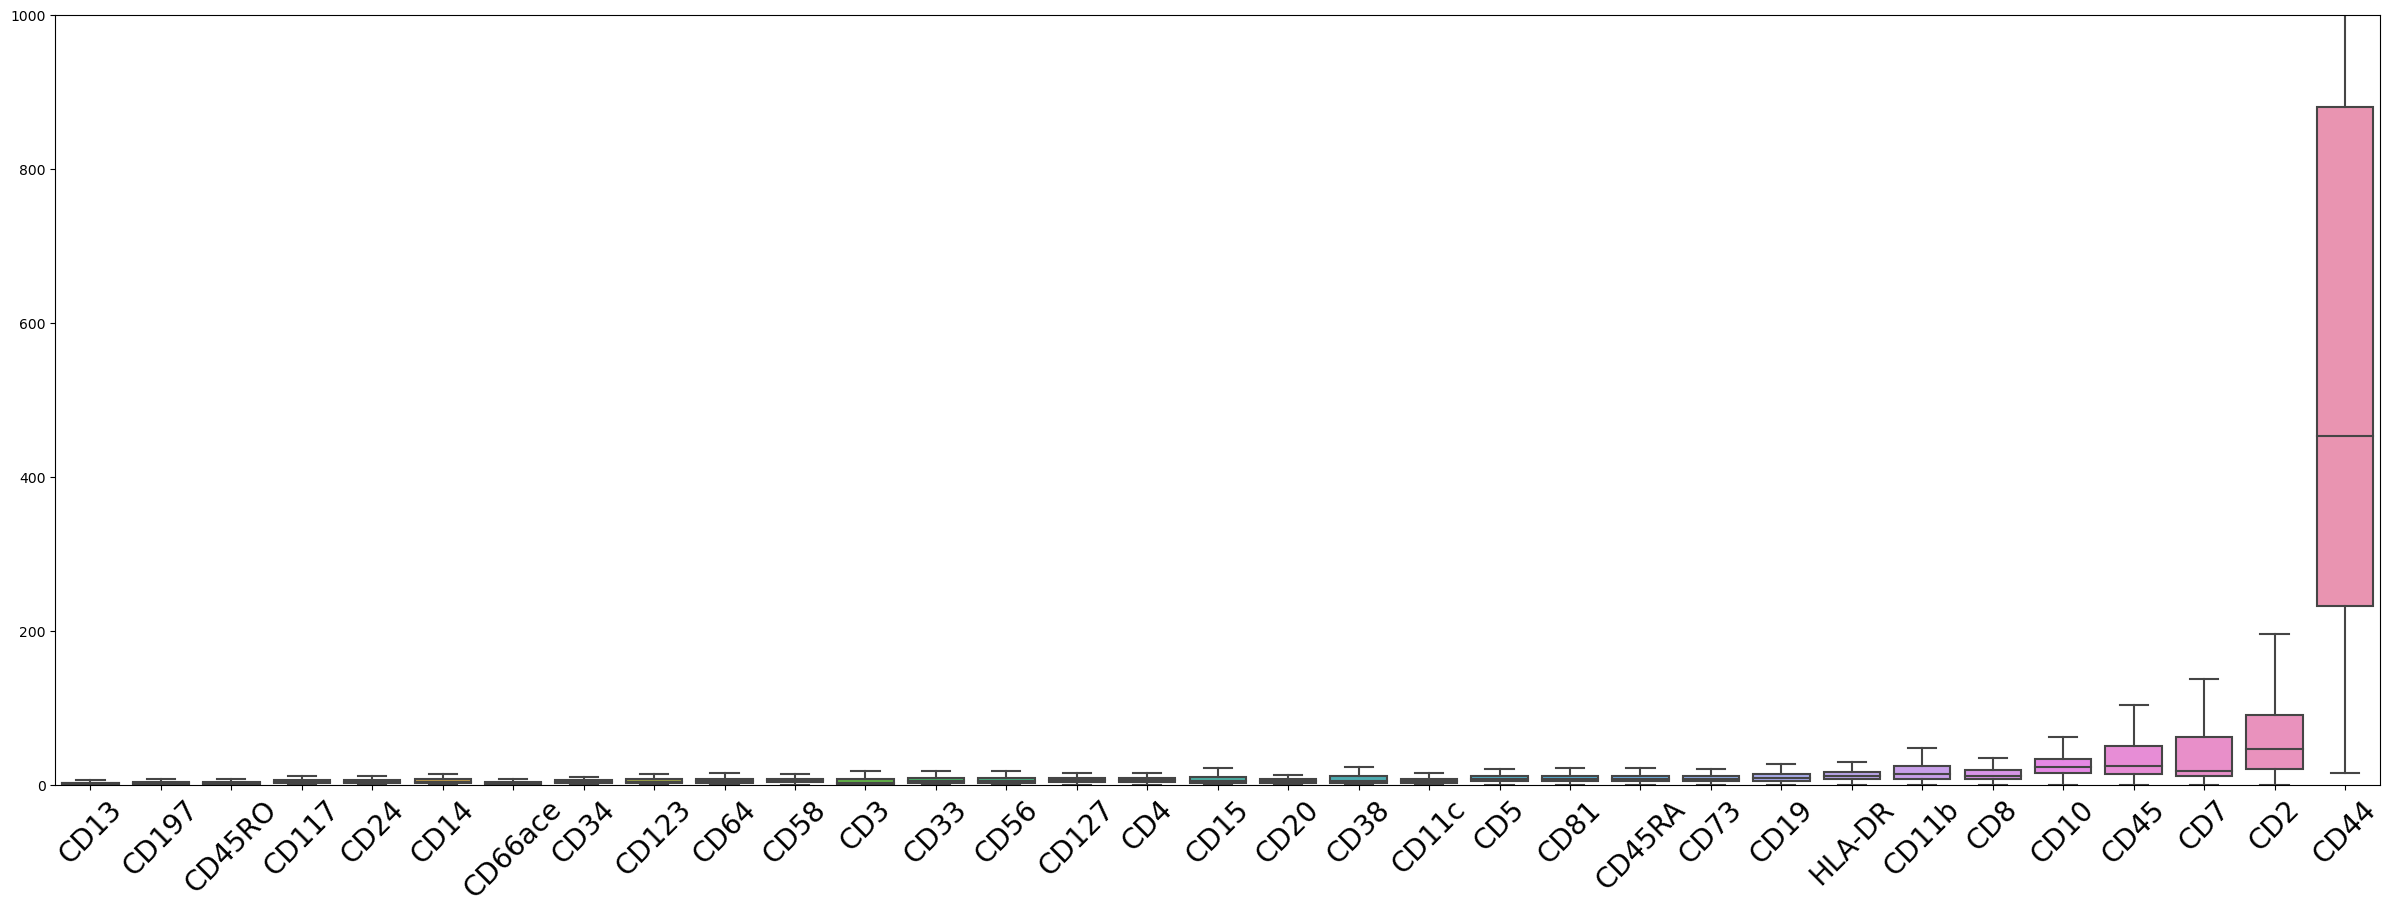

In [81]:
plt.figure(figsize=(30,10))
plt.ylim(0, 1000)
e=sns.boxplot(data=df_sorted2,  fliersize=0)

e.set_xticklabels(d.get_xticklabels(),rotation=45) #rotation

e.tick_params(axis='x', labelsize=20) #increased font

In [82]:
# a data

index_rank1 = prot_a.mean().sort_values(ascending=False).index


#easi data

index_rank2= prot_easi.mean().sort_values(ascending=False).index


#list of rank numbers
ranks = []
for i in range(1, 34):
    ranks.append(i)

In [84]:
df_ranks=pd.DataFrame(index_rank1)


df_ranks["easigenomics"] = pd.DataFrame(index_rank2)
df_ranks["a data"] = pd.DataFrame(index_rank1)
df_ranks["Rank"] = pd.DataFrame(ranks)

df_ranks

0 easigenomics   a data  Rank
0      CD44         CD10     CD44     1
1       CD2         CD44      CD2     2
2       CD7         CD34      CD7     3
3      CD45       HLA-DR     CD45     4
4      CD10         CD19     CD10     5
5       CD8         CD58      CD8     6
6     CD11b         CD73    CD11b     7
7    HLA-DR         CD81   HLA-DR     8
8      CD19         CD45     CD19     9
9      CD73          CD2     CD73    10
10   CD45RA        CD11b   CD45RA    11
11     CD81        CD123     CD81    12
12      CD5         CD15      CD5    13
13    CD11c          CD8    CD11c    14
14     CD38         CD20     CD38    15
15     CD20        CD11c     CD20    16
16     CD15       CD45RA     CD15    17
17      CD4          CD4      CD4    18
18    CD127        CD117    CD127    19
19     CD56         CD24     CD56    20
20     CD33         CD38     CD33    21
21      CD3          CD3      CD3    22
22     CD58         CD14     CD58    23
23     CD64         CD56     CD64    24
24    CD123         CD64    CD123    25
25     CD34          CD5     CD34    26
26  CD66ace          CD7  CD66ace    27
27     CD14      CD66ace     CD14    28
28     CD24       CD45RO     CD24    29
29    CD117        CD127    CD117    30
30   CD45RO         CD33   CD45RO    31
31    CD197        CD197    CD197    32
32     CD13         CD13     CD13    33

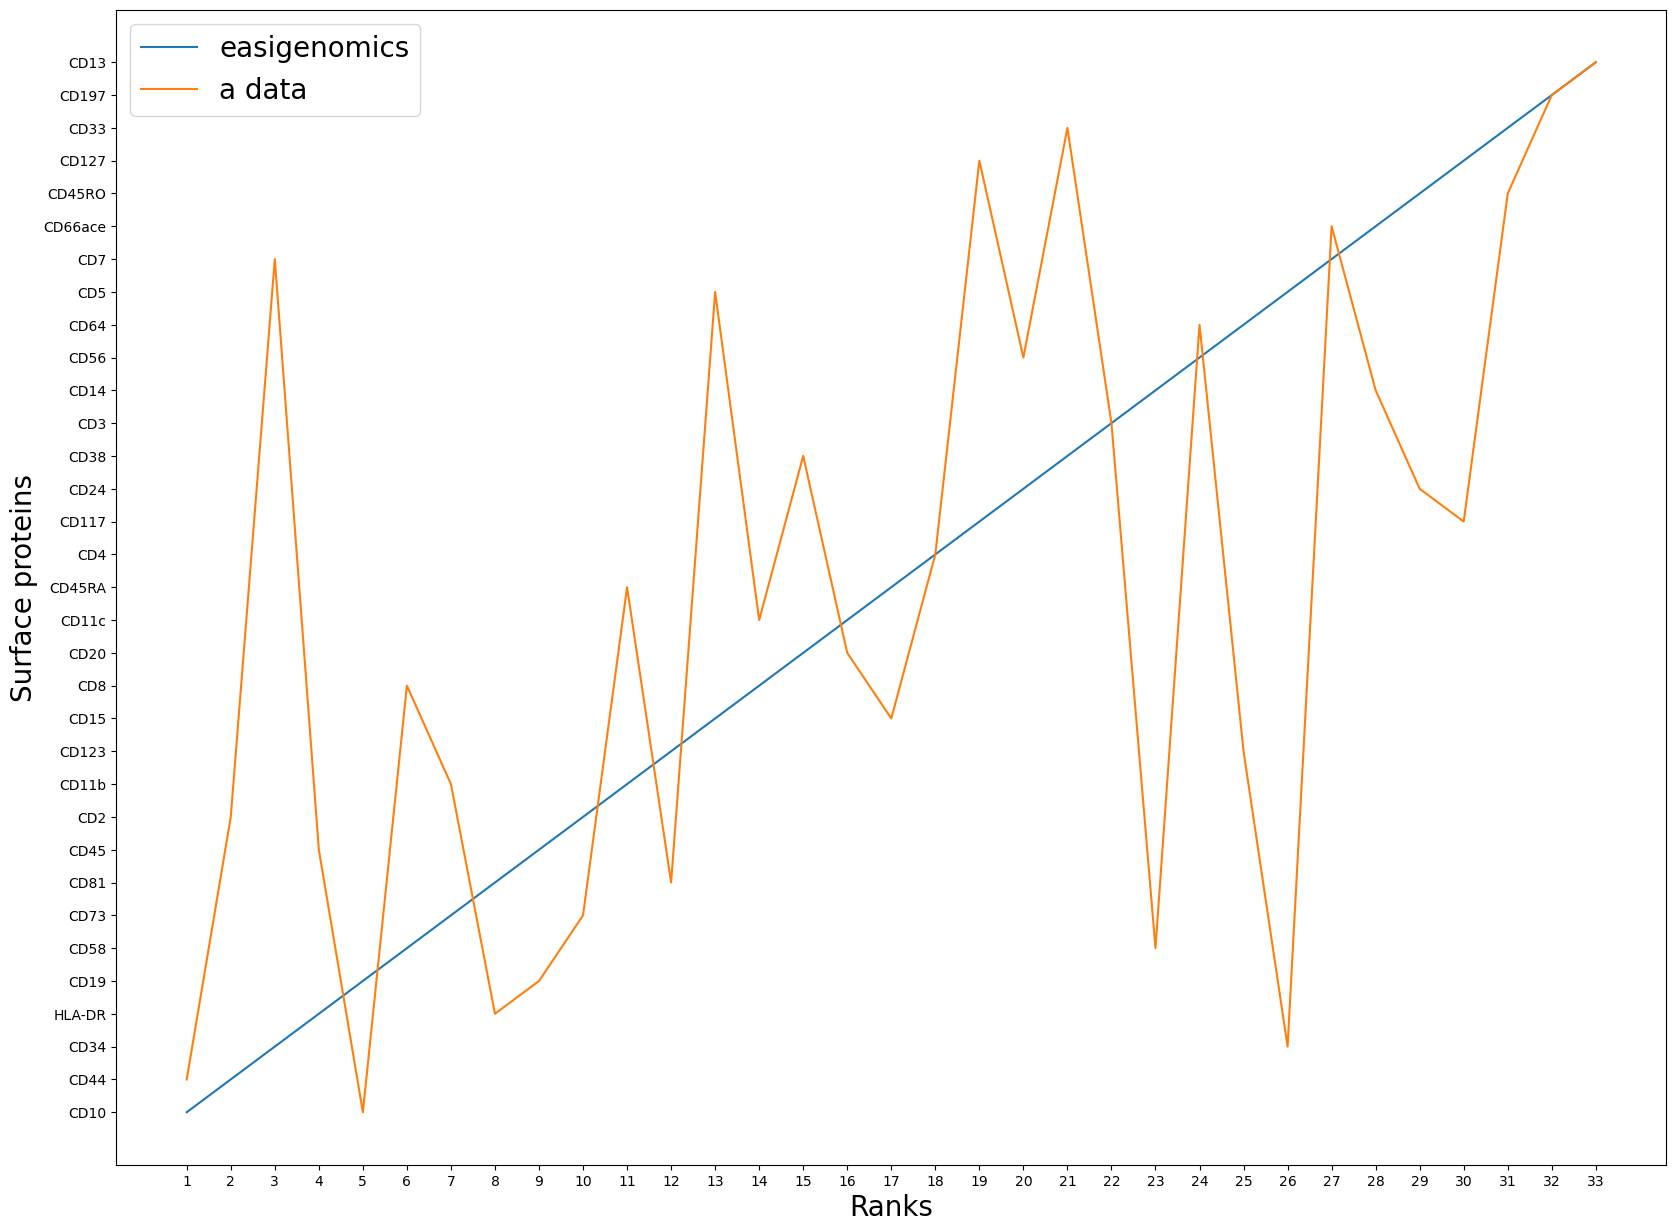

In [85]:
fig, ax = plt.subplots(figsize=(20, 15))

x= df_ranks["Rank"]
y= df_ranks["easigenomics"]
y2 = df_ranks["a data"]

ax.plot(x,y,label='easigenomics')
ax.plot(x,y2,label='a data')

ax.set_xlabel('Ranks', fontsize=20)  
ax.set_ylabel('Surface proteins', fontsize=20)  

plt.xticks(np.arange(1, 34)) ;
plt.legend(fontsize=20) ;



In [98]:
column_names=prot_easi.columns

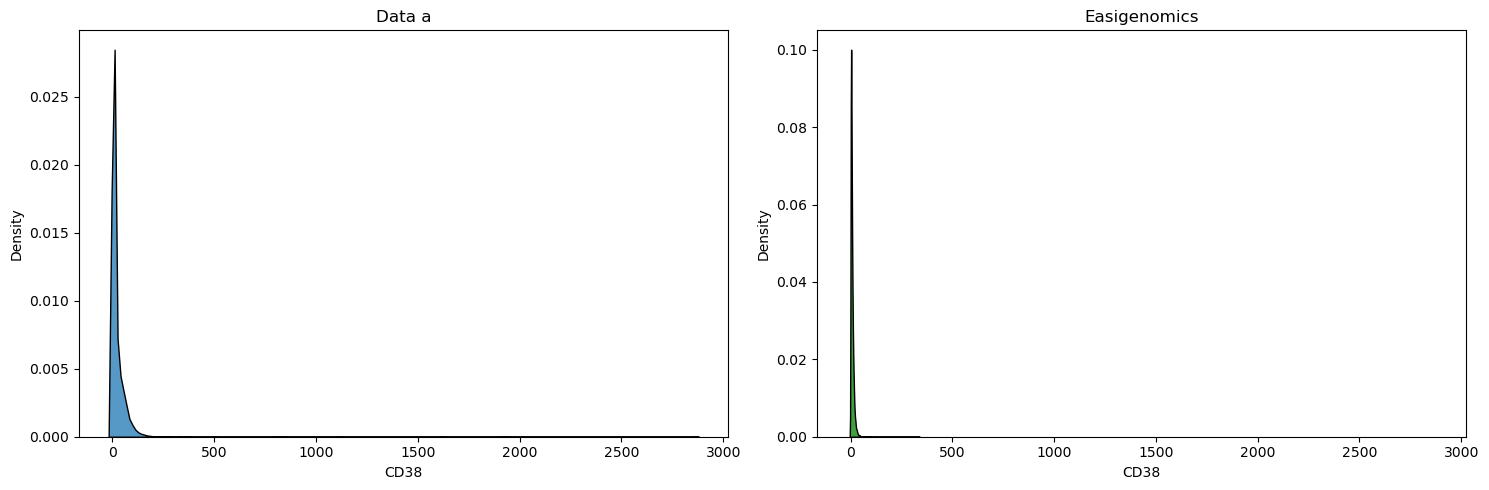

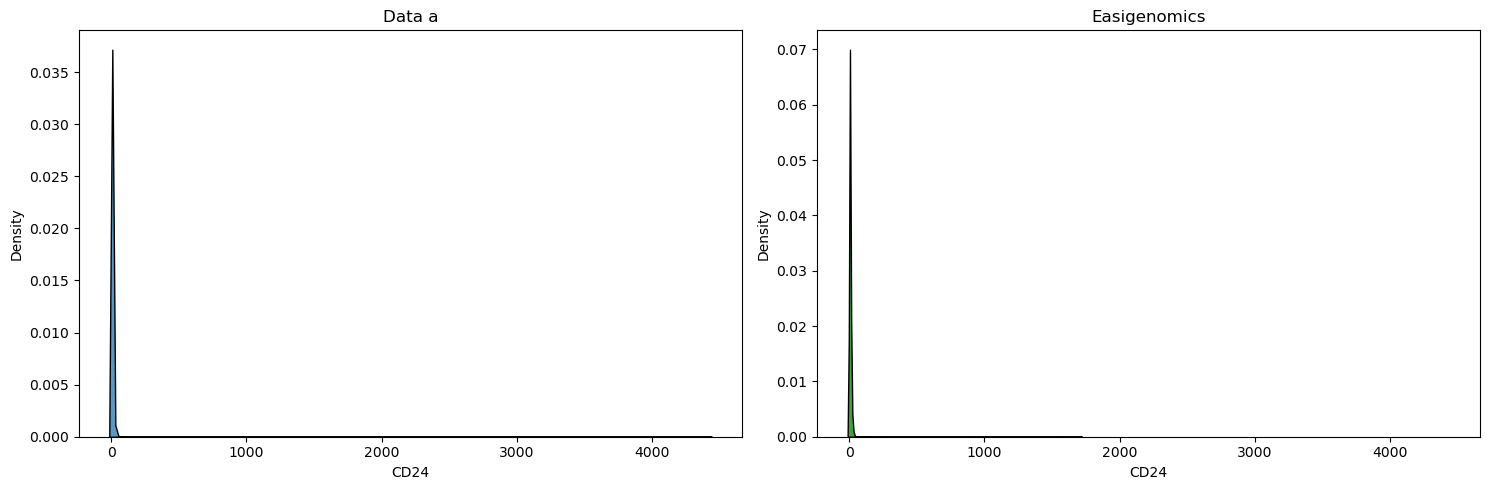

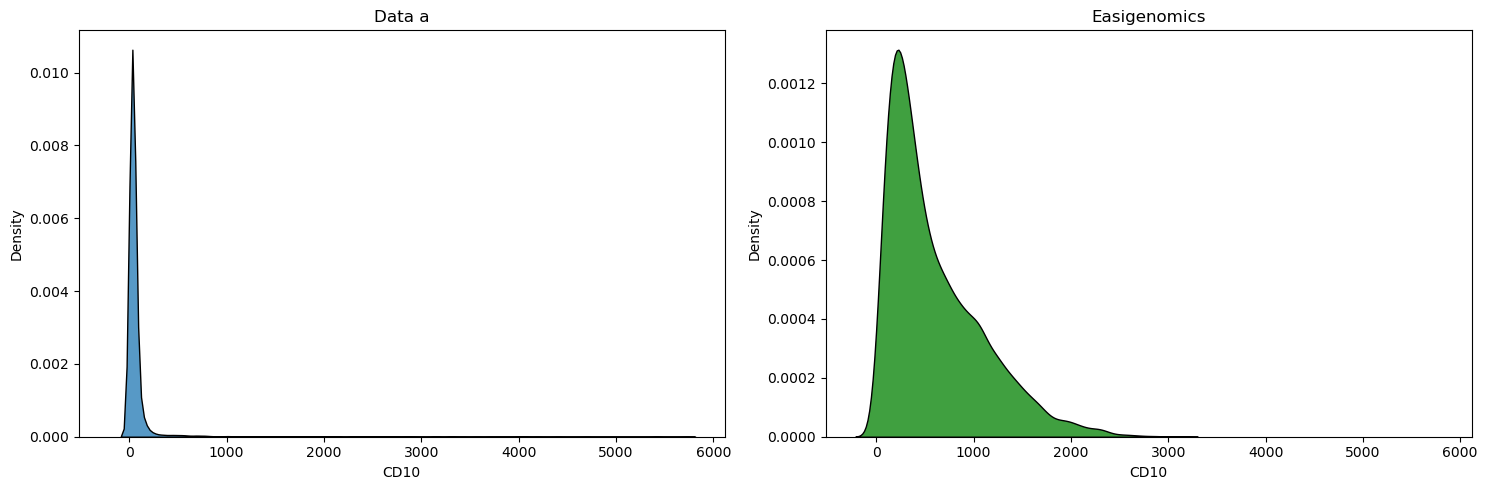

In [102]:
#early B-cell markers: CD38, CD24, CD10   #early B-cell markers
    
markers = ["CD38", 'CD24', 'CD10']
    
for column_name in markers:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot_a, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=prot_easi, x=column_name, multiple="stack", color="g", ax=ax[1]) ;
   
    ax1.title.set_text('Data a')    
    ax2.title.set_text('Easigenomics')
    
    plt.show()

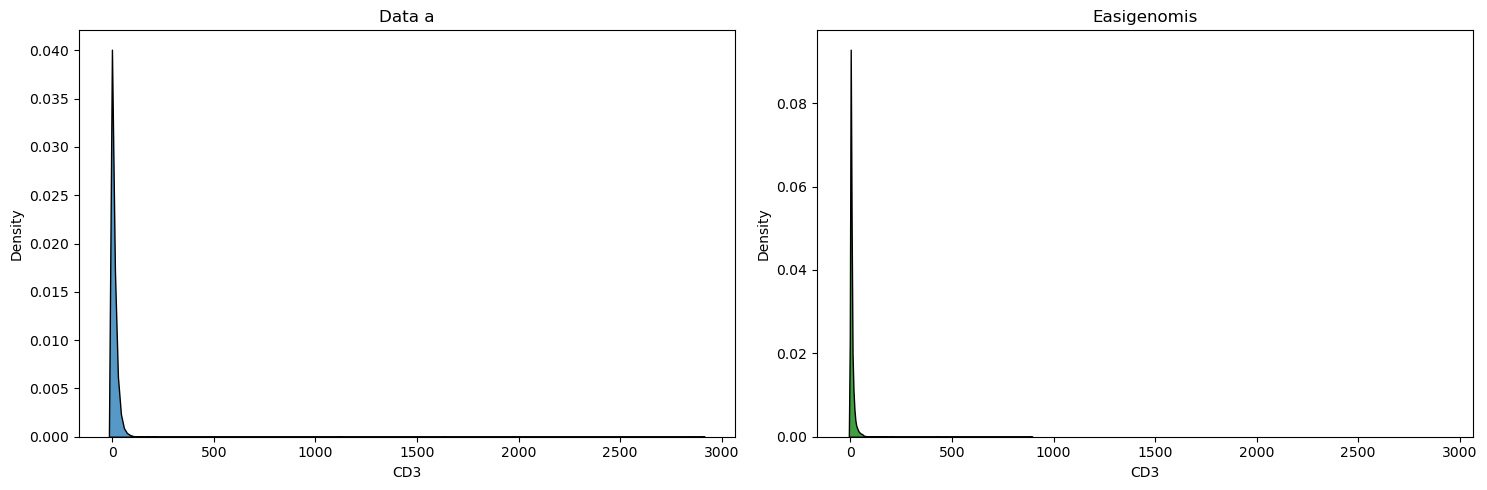

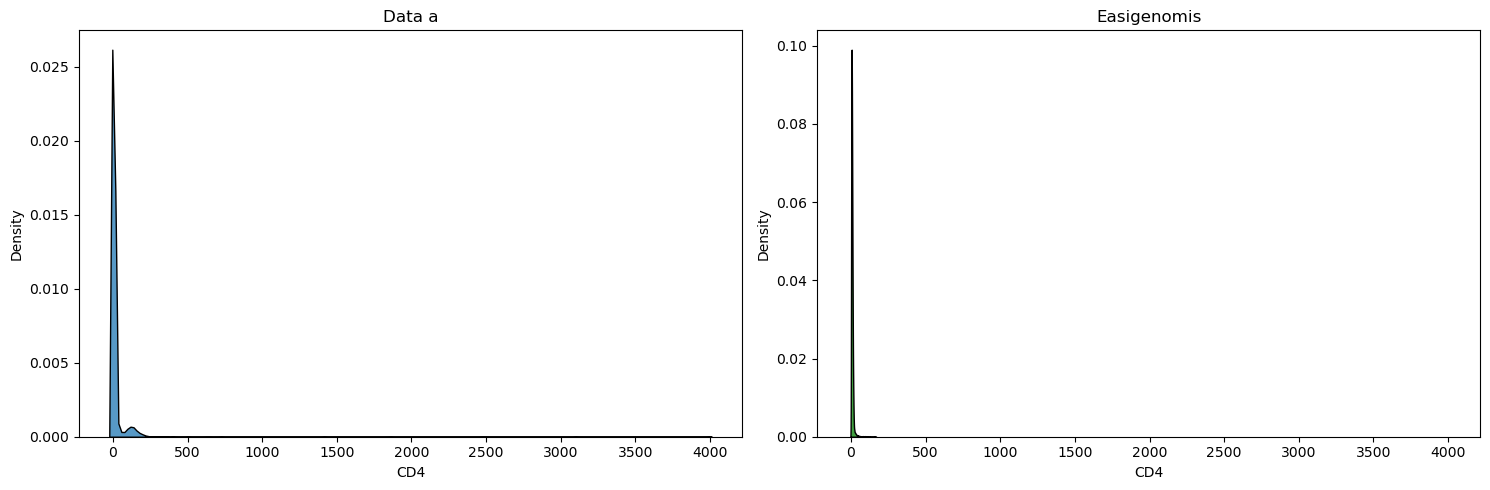

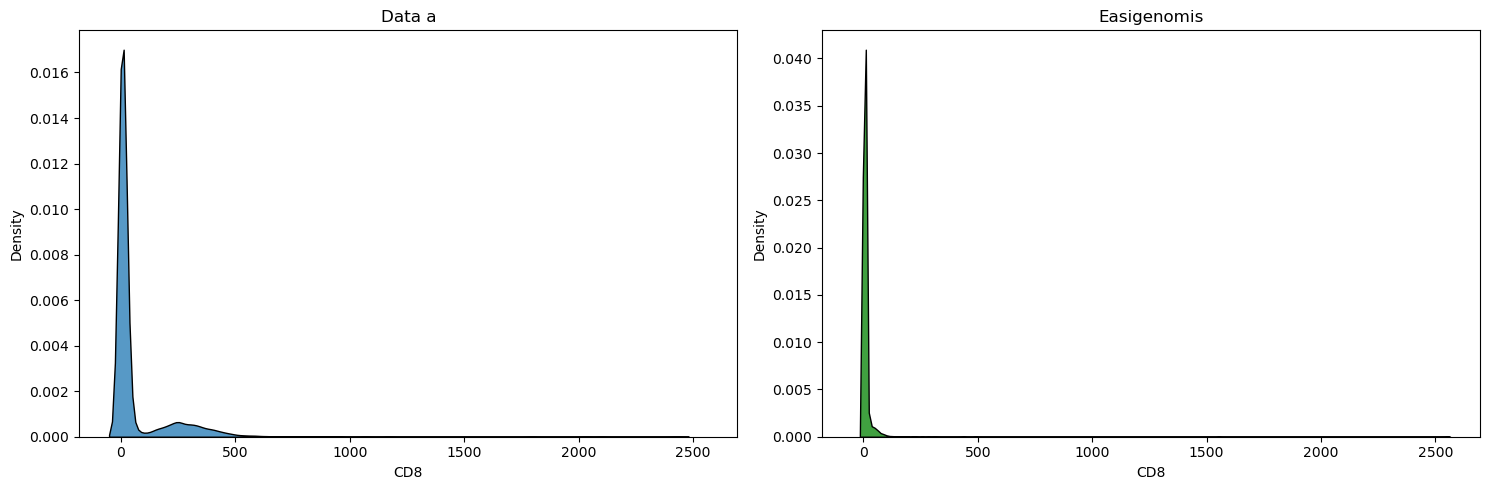

In [103]:
markers = ["CD3", 'CD4', 'CD8']  #T-cell markers
    
for column_name in markers:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot_a, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=prot_easi, x=column_name, multiple="stack", color="g", ax=ax[1]) ;
   
    ax1.title.set_text('Data a')    
    ax2.title.set_text('Easigenomis')
    
    plt.show()

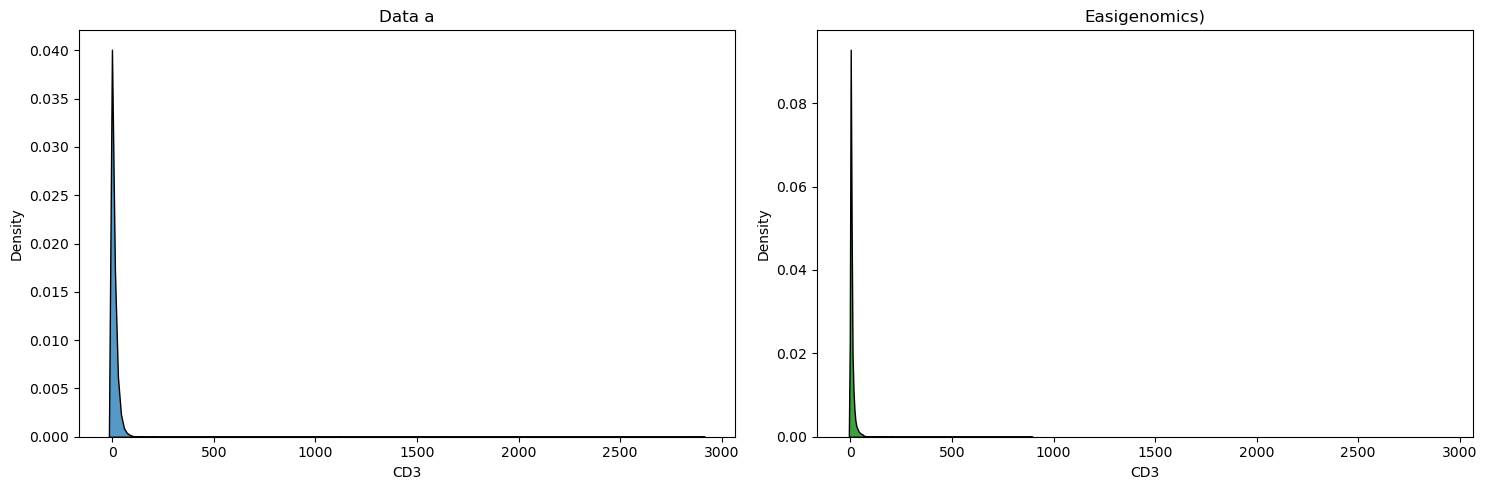

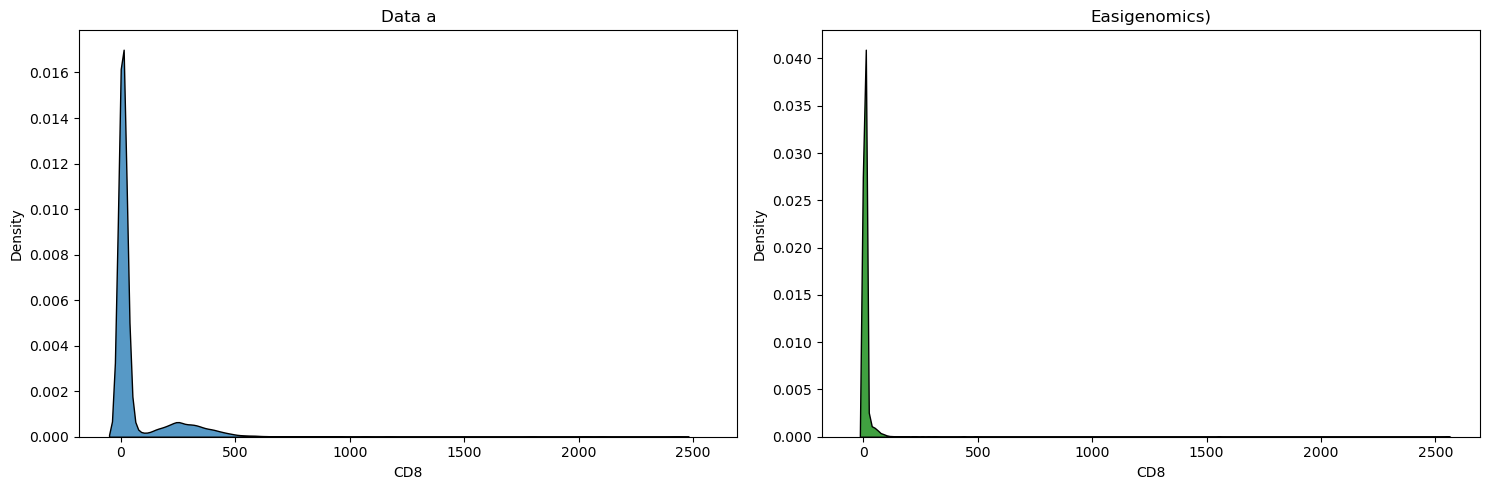

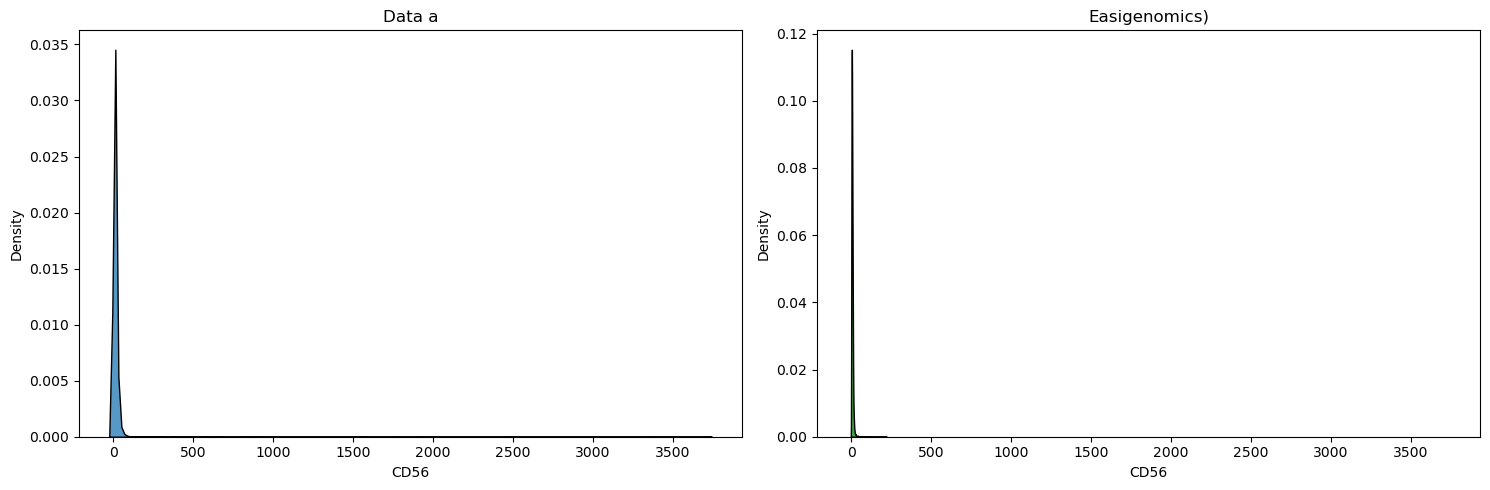

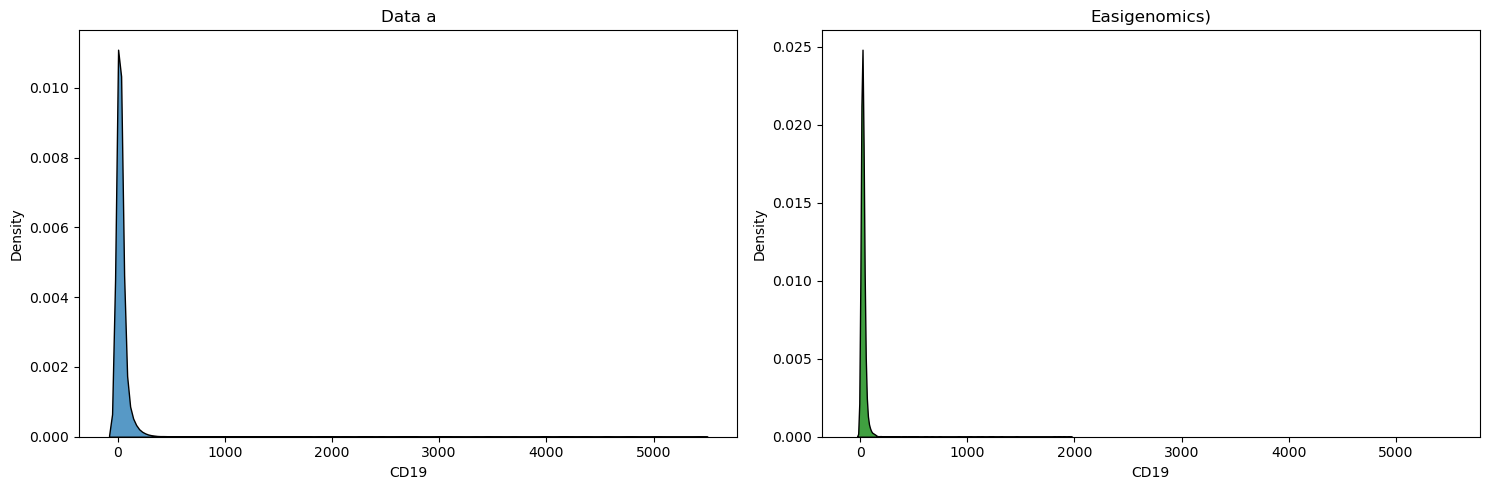

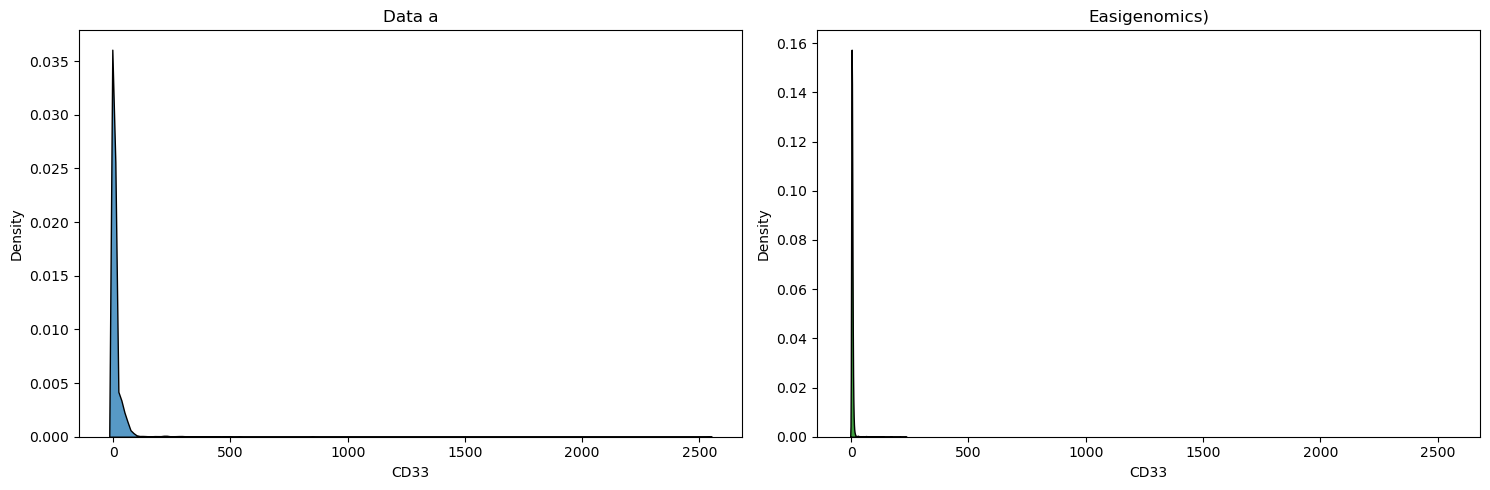

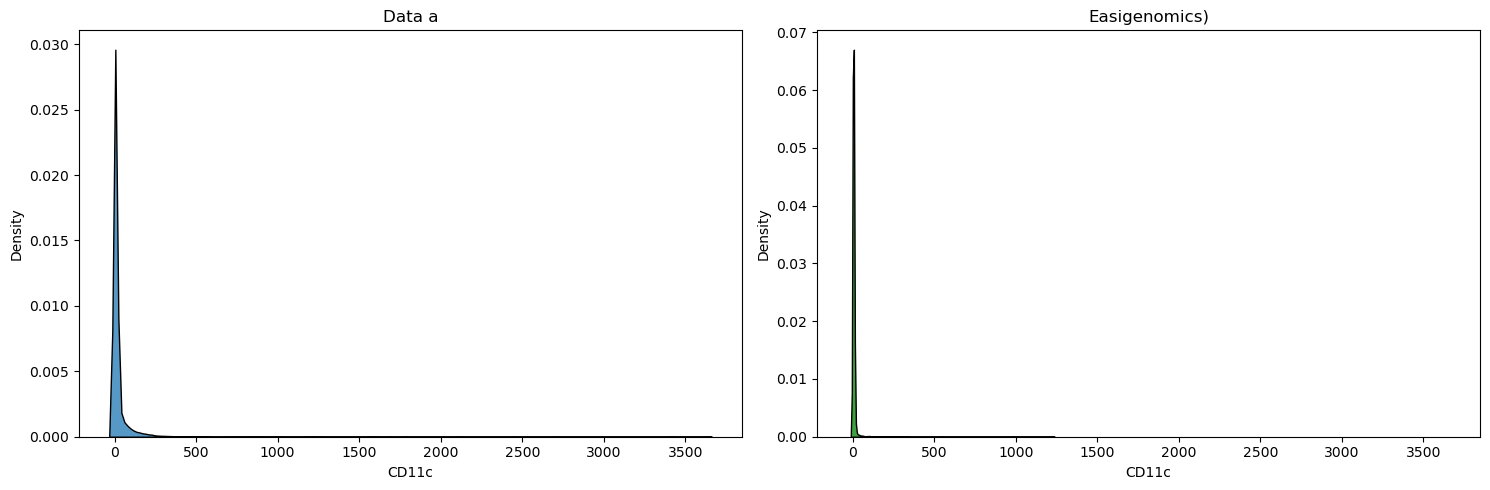

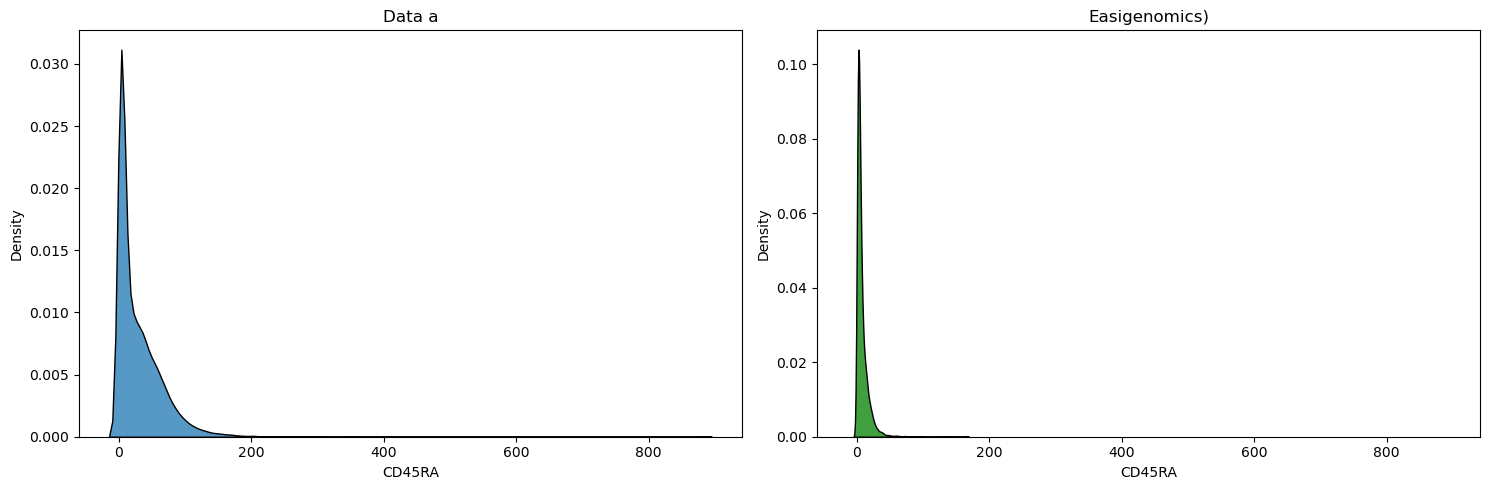

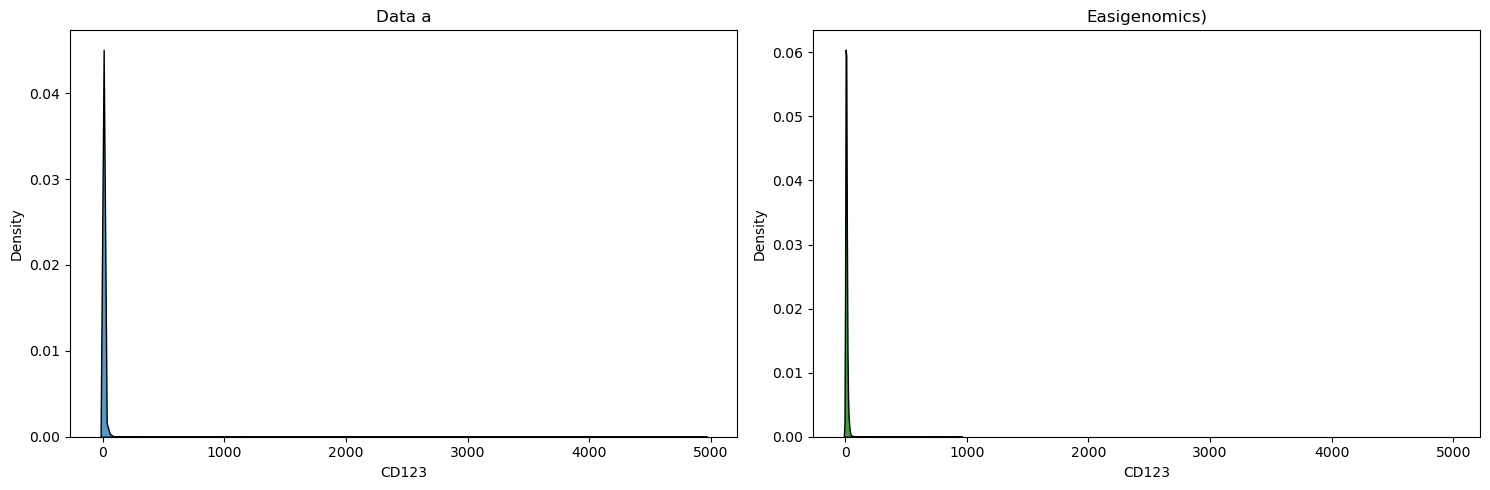

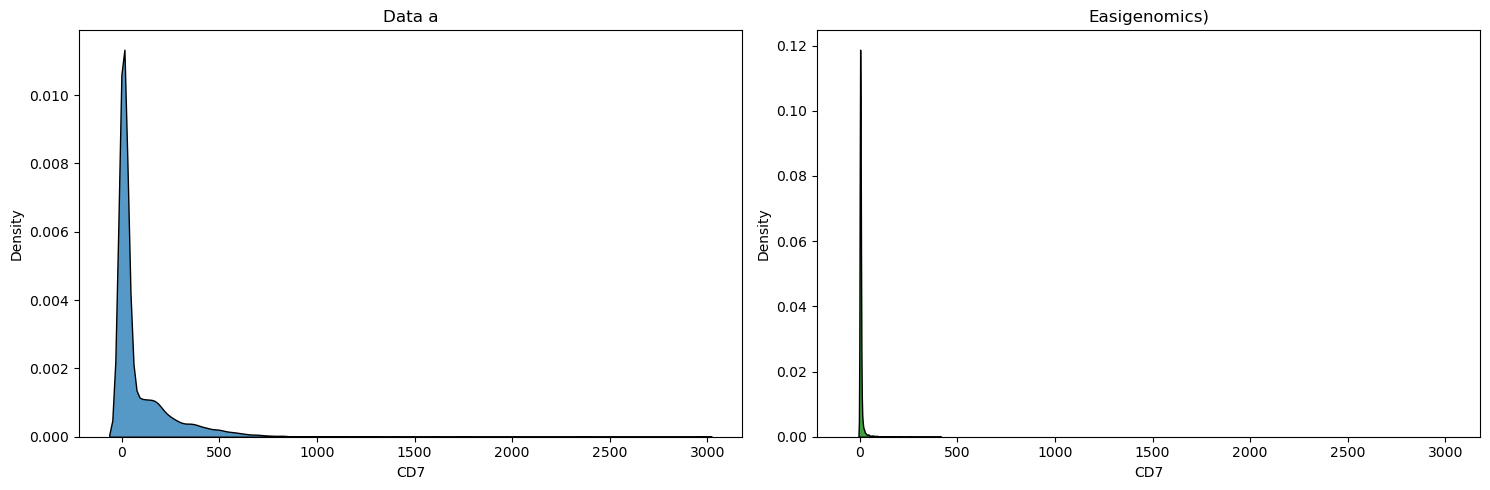

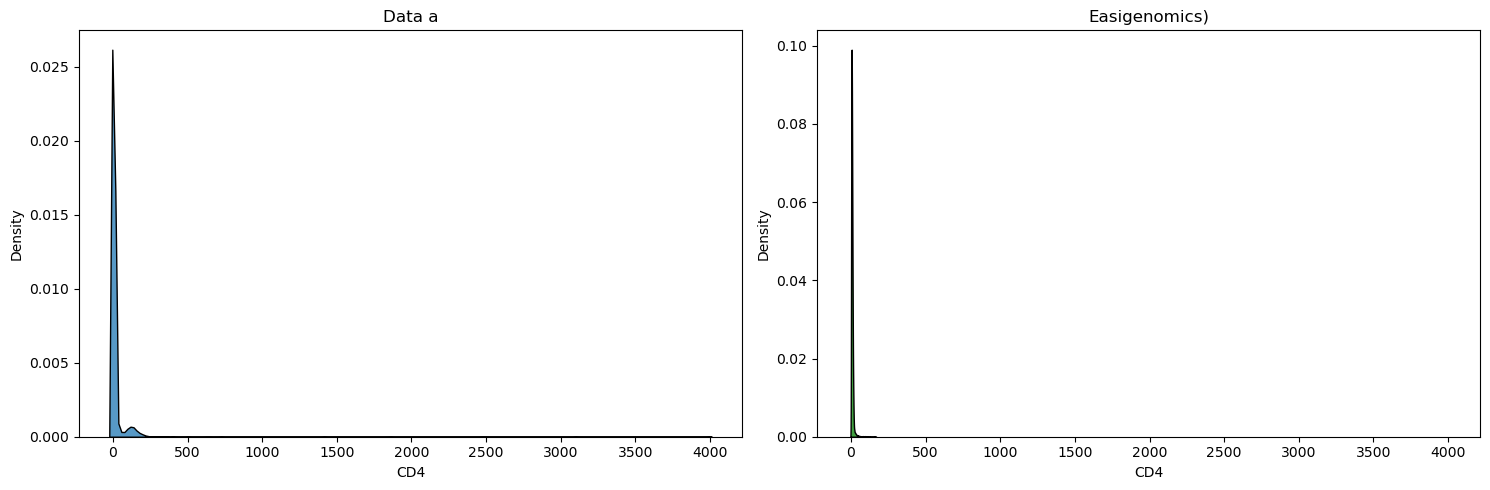

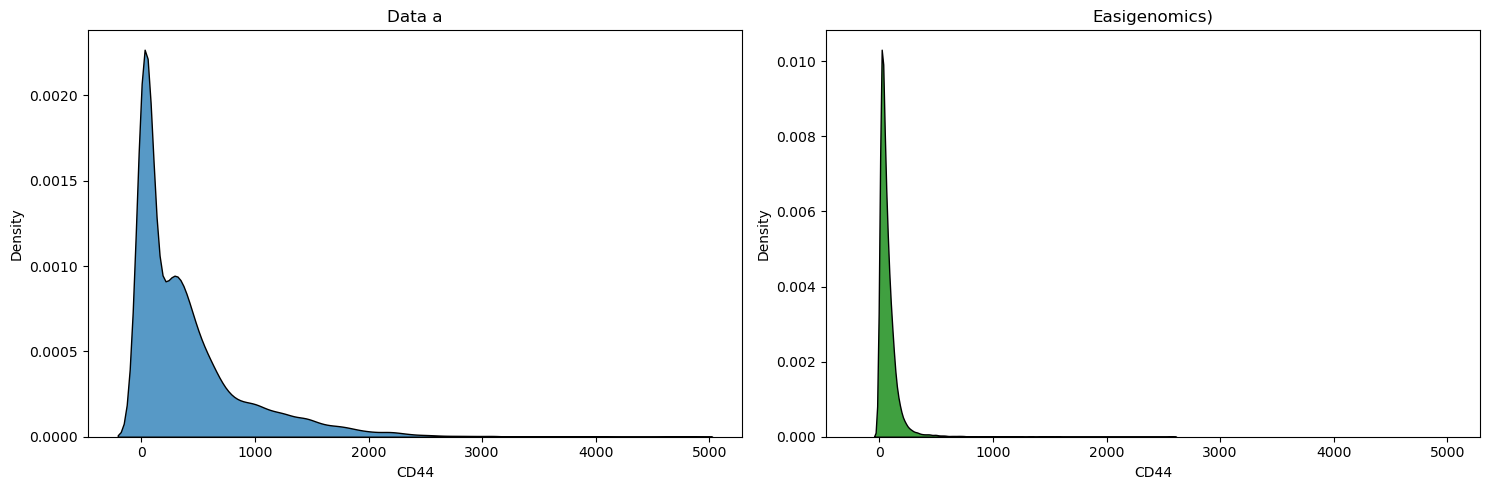

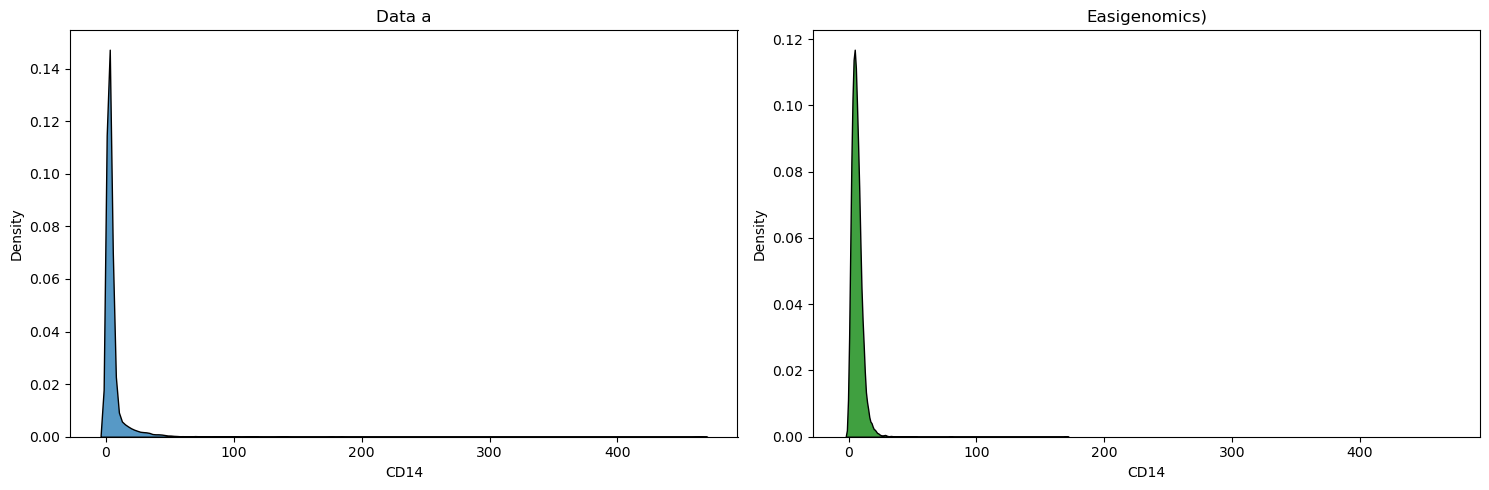

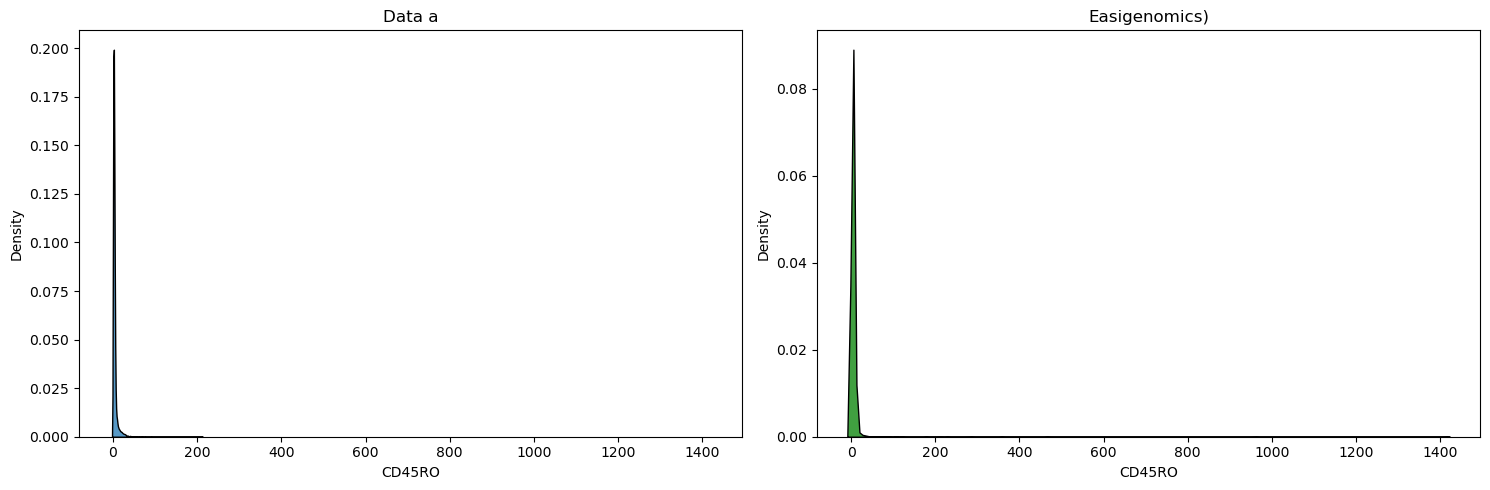

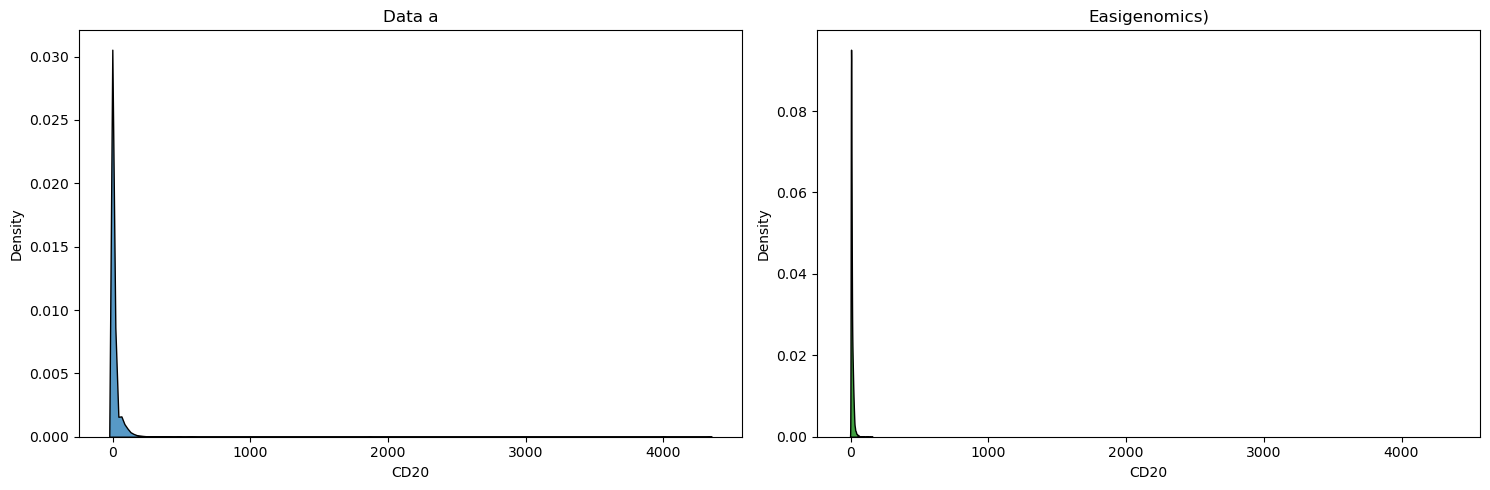

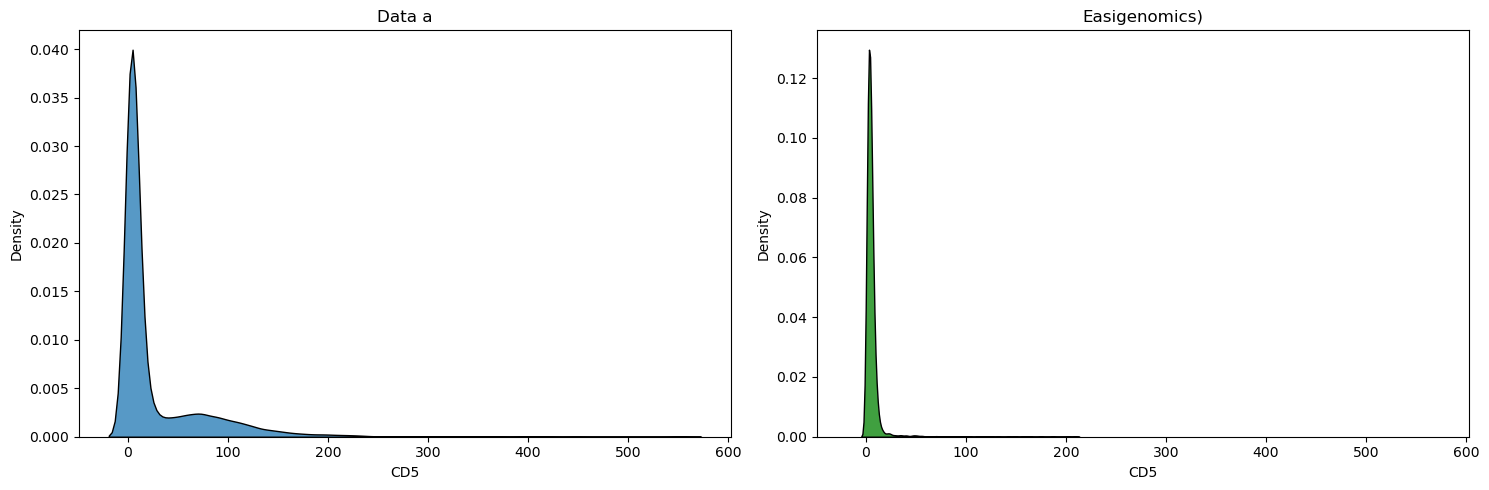

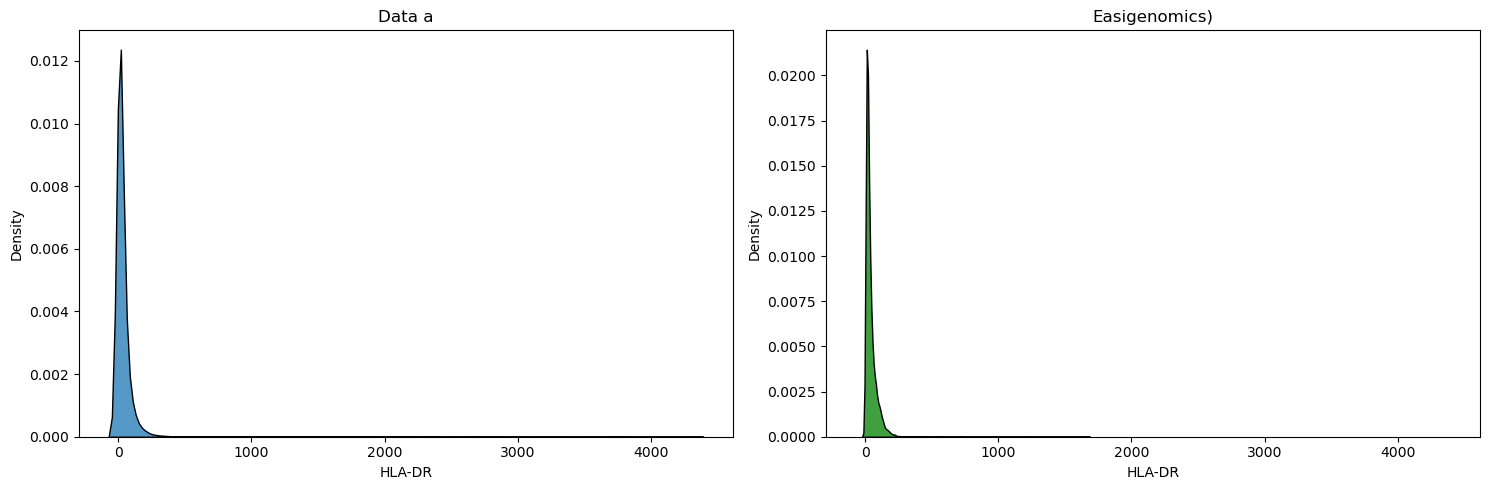

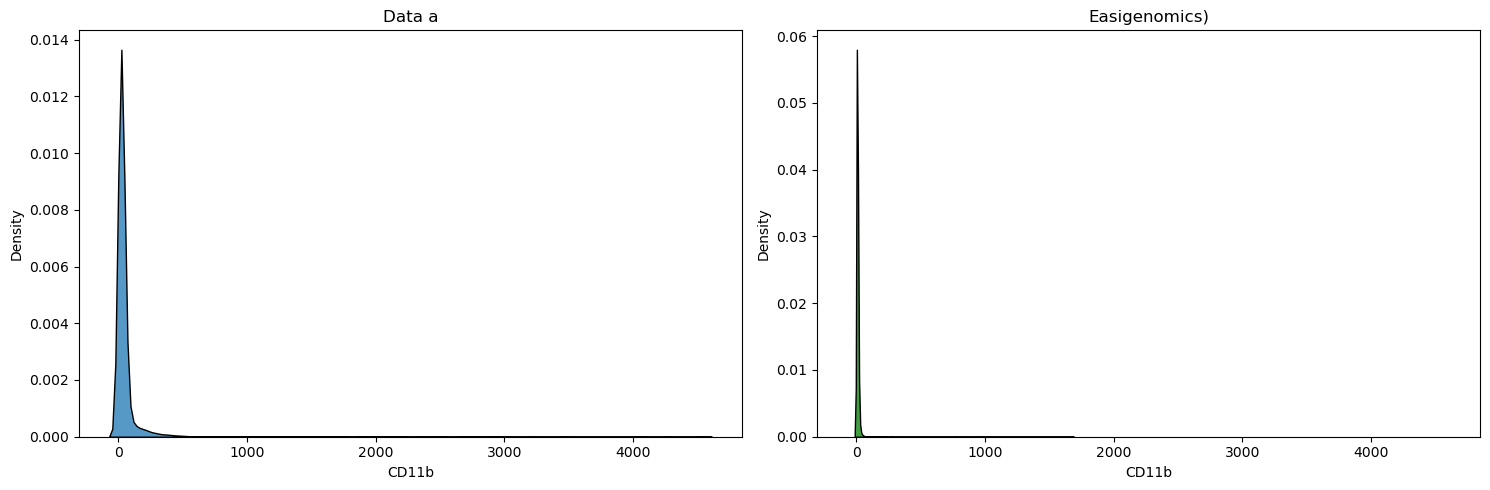

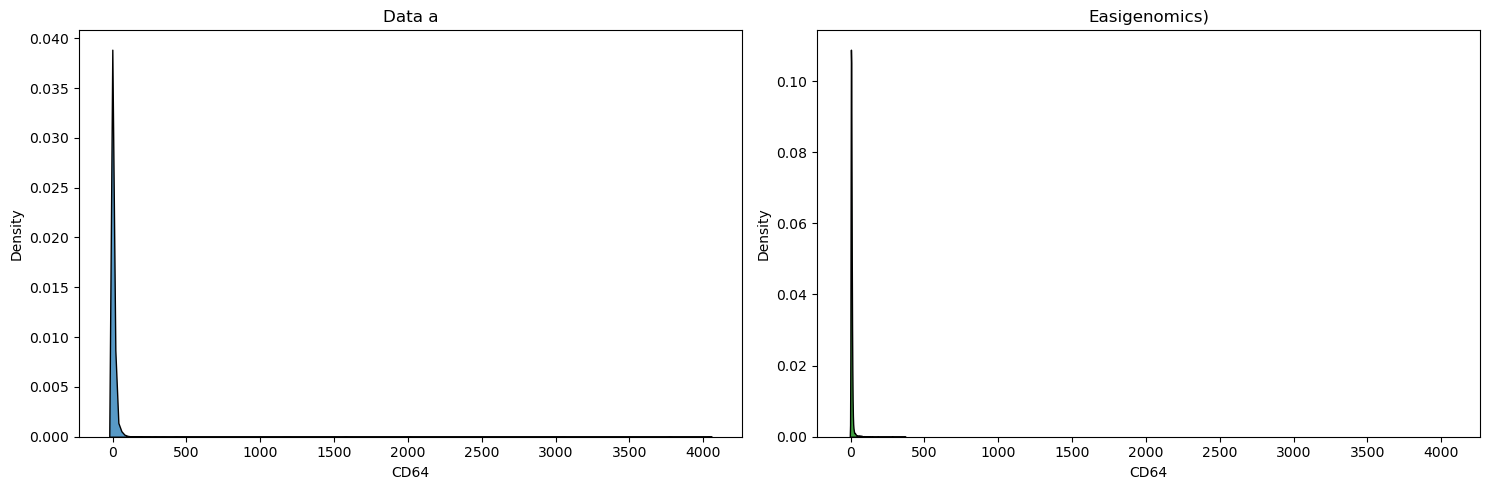

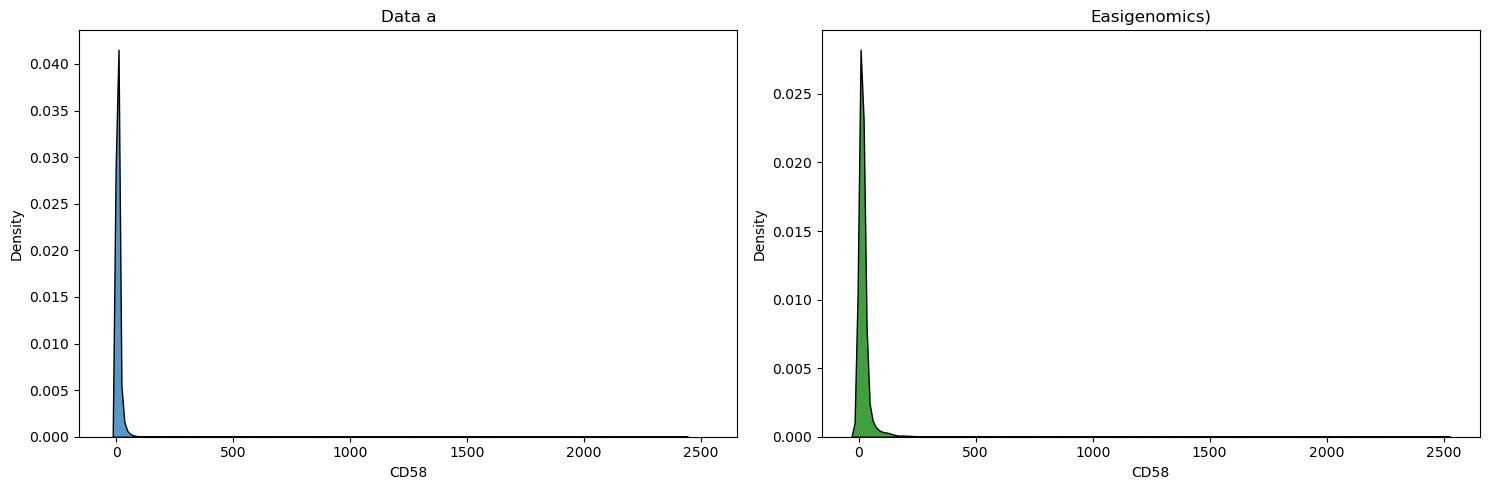

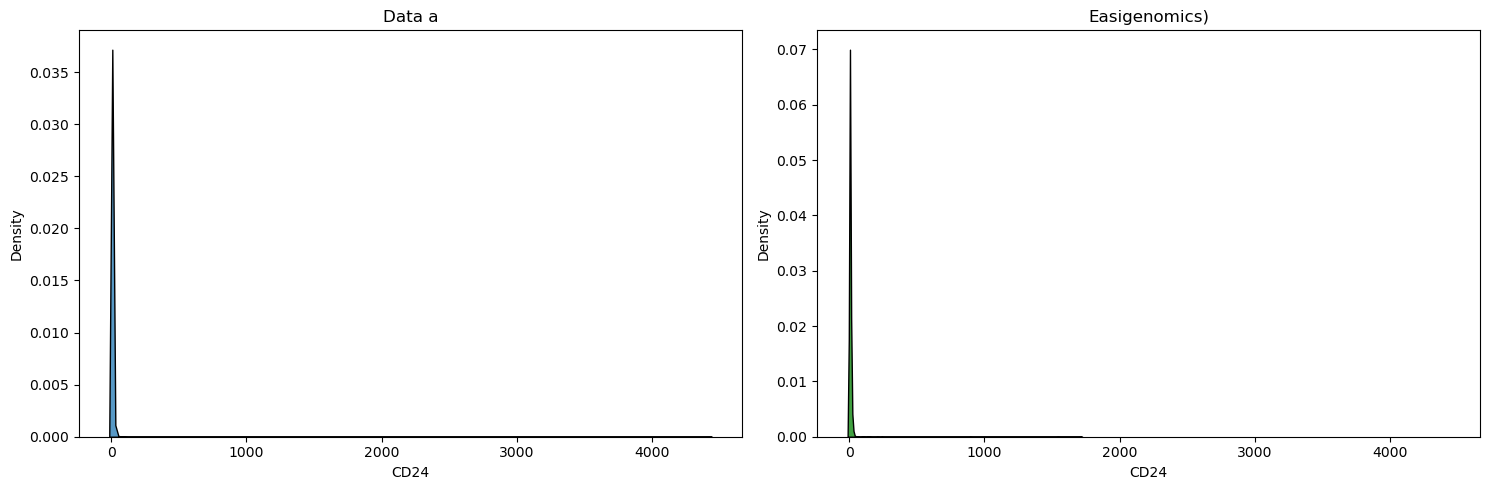

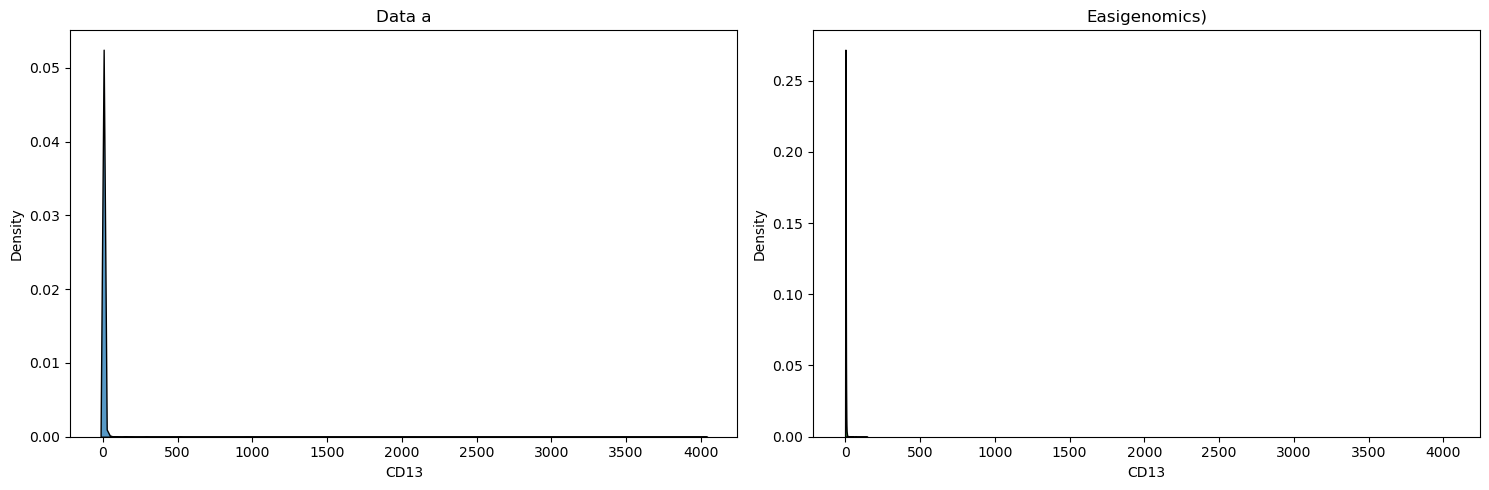

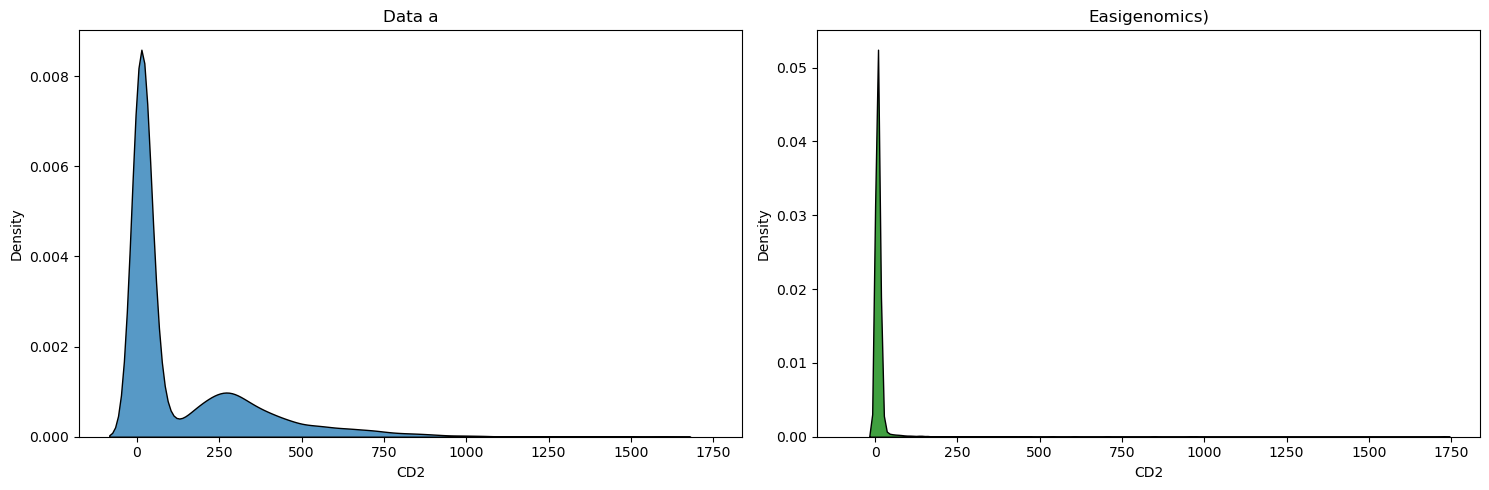

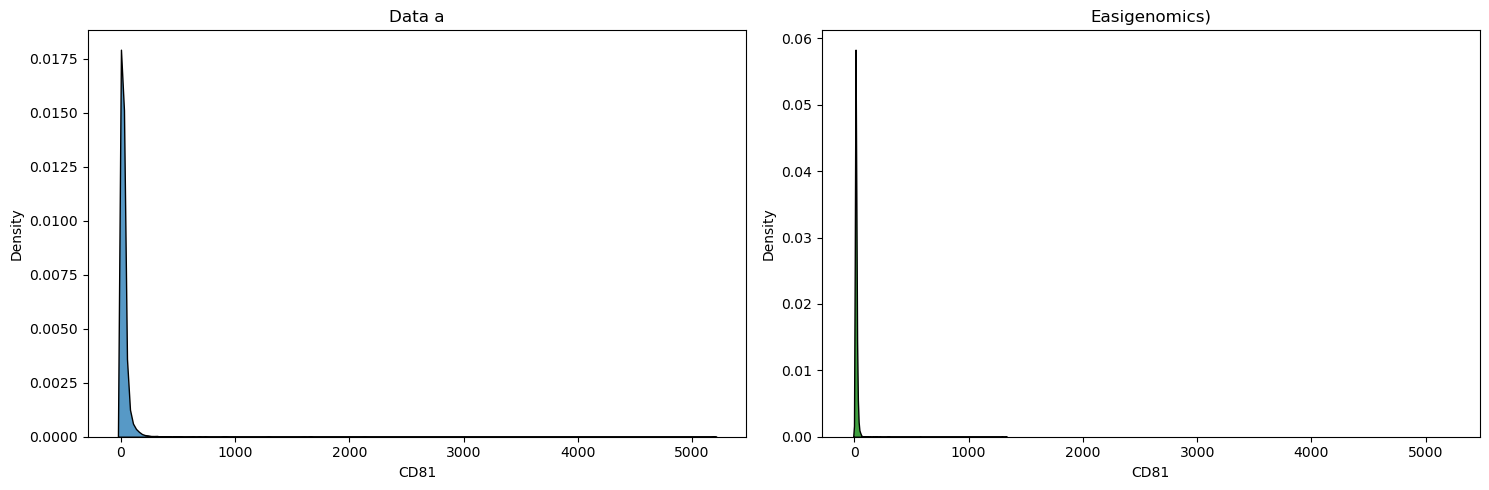

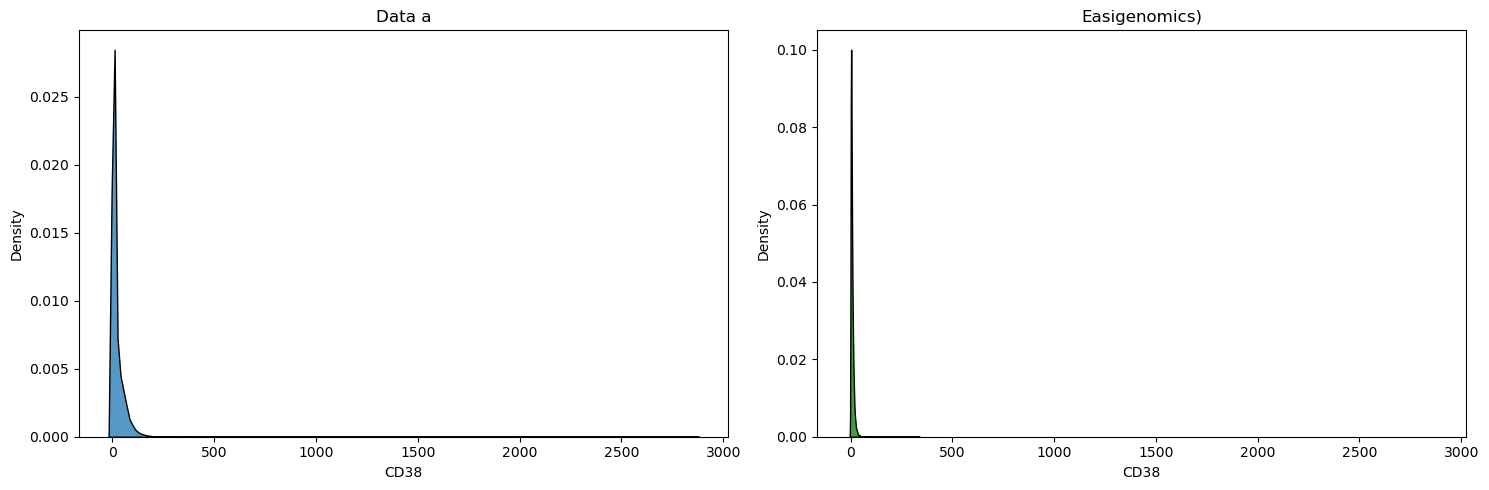

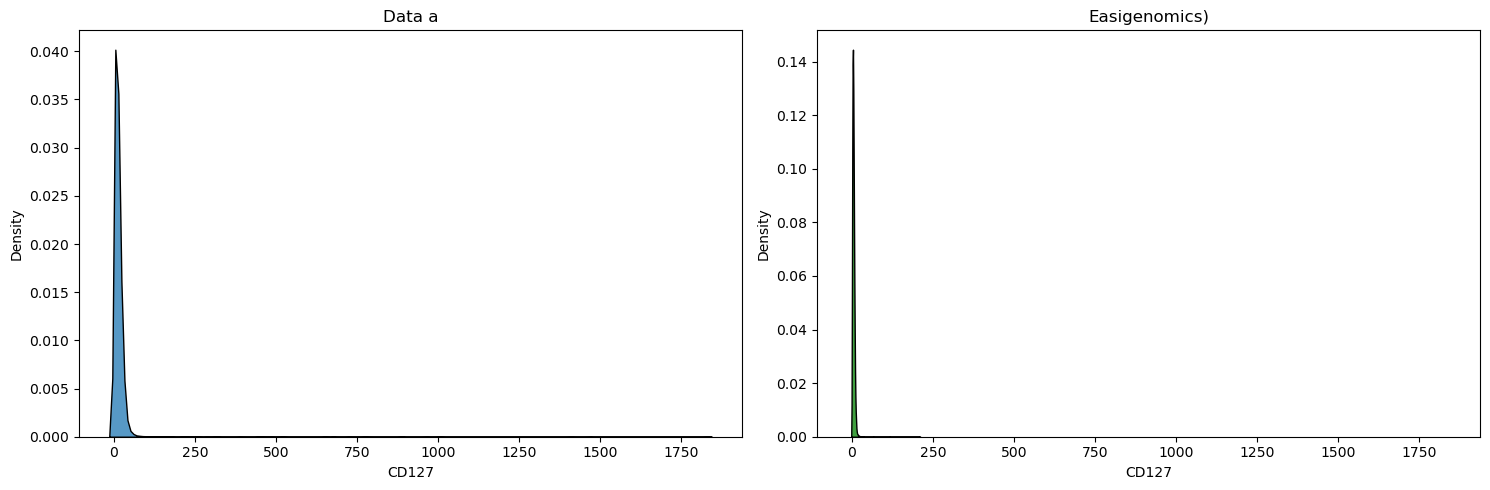

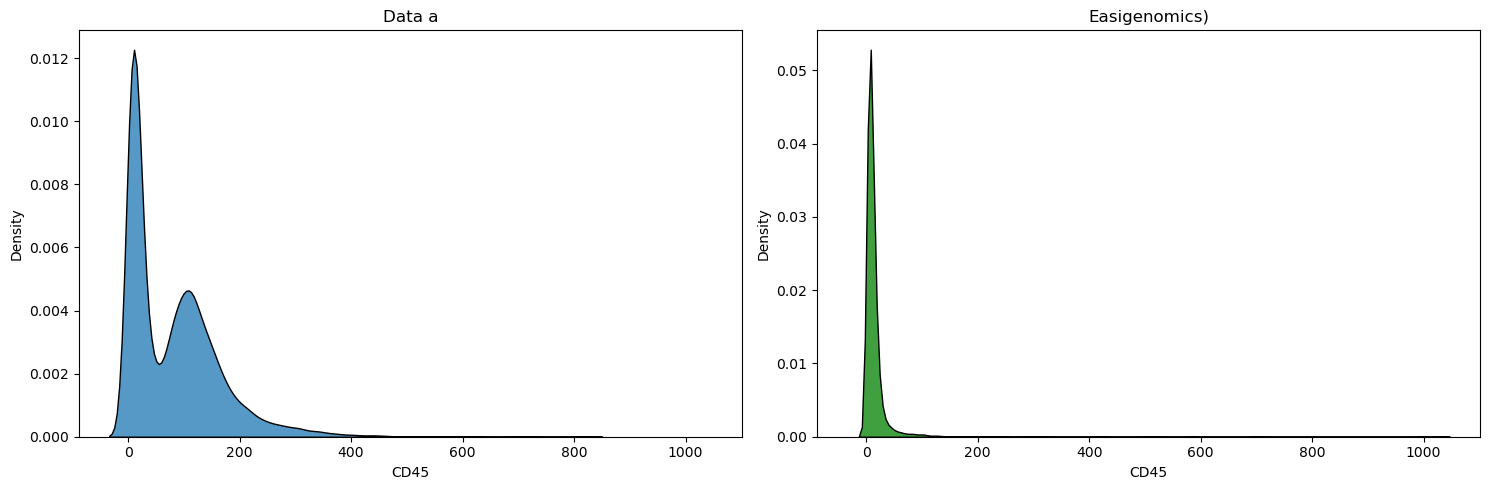

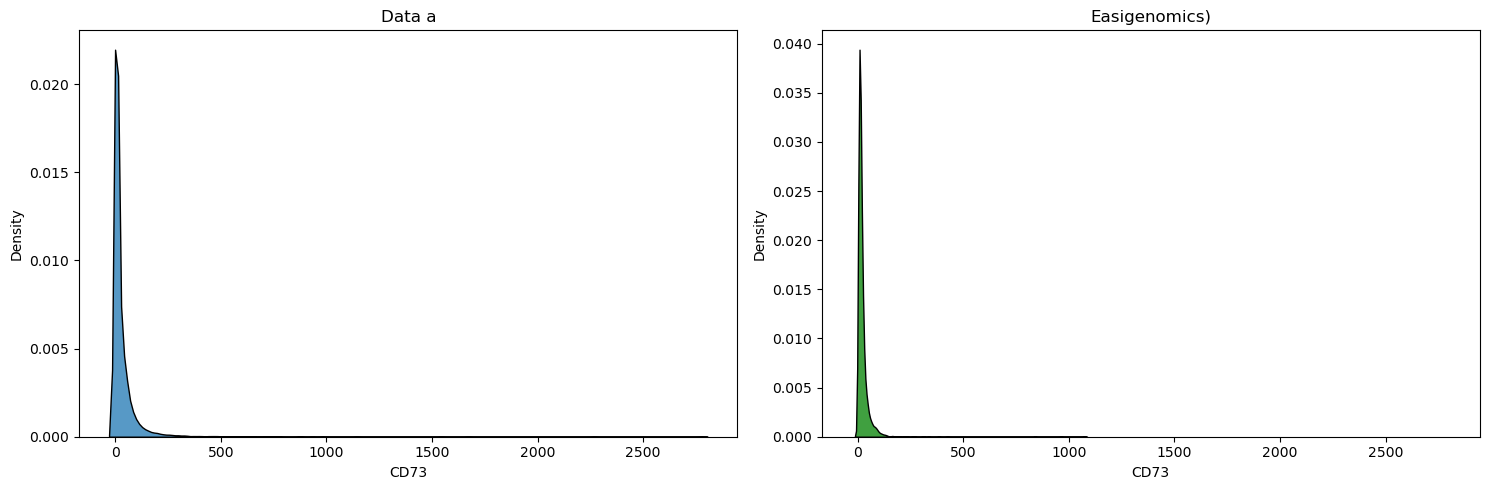

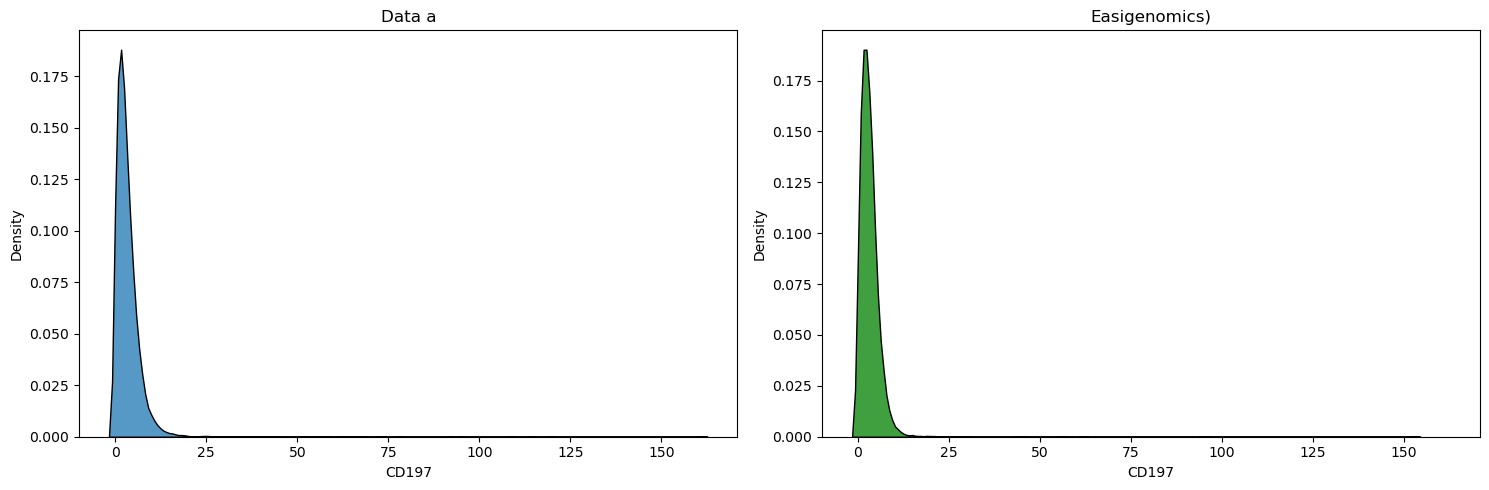

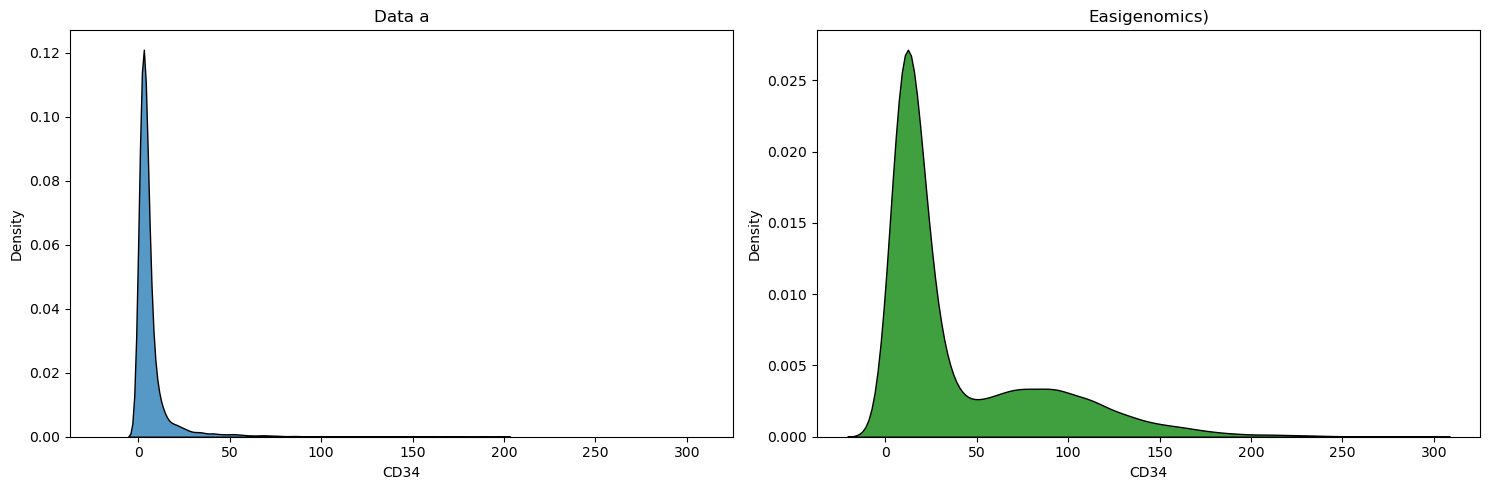

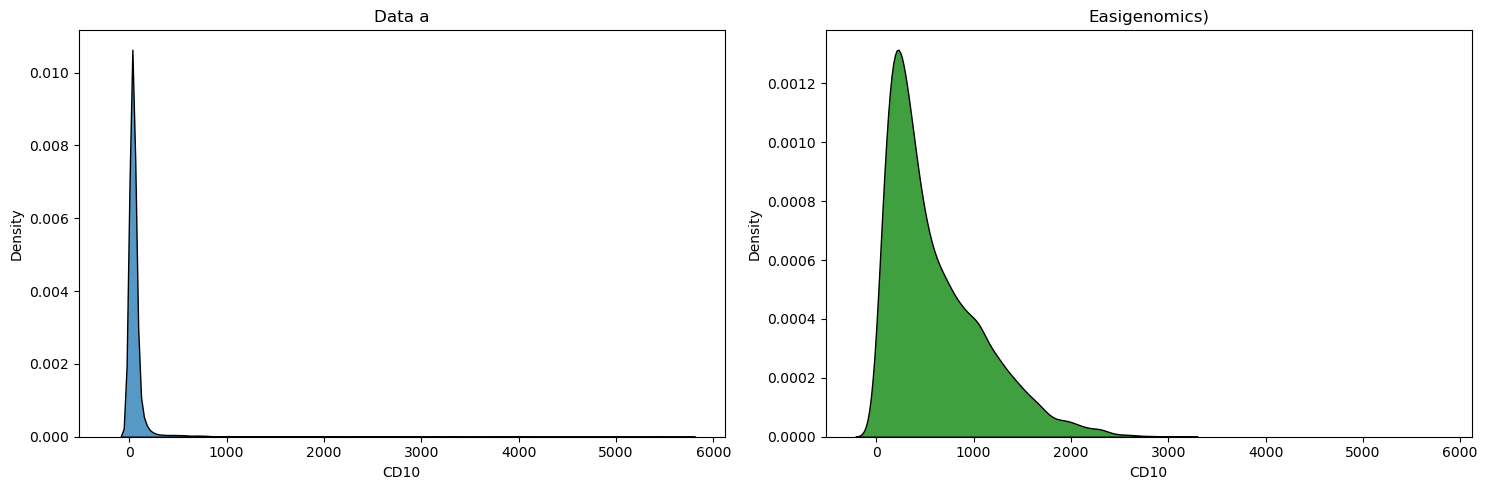

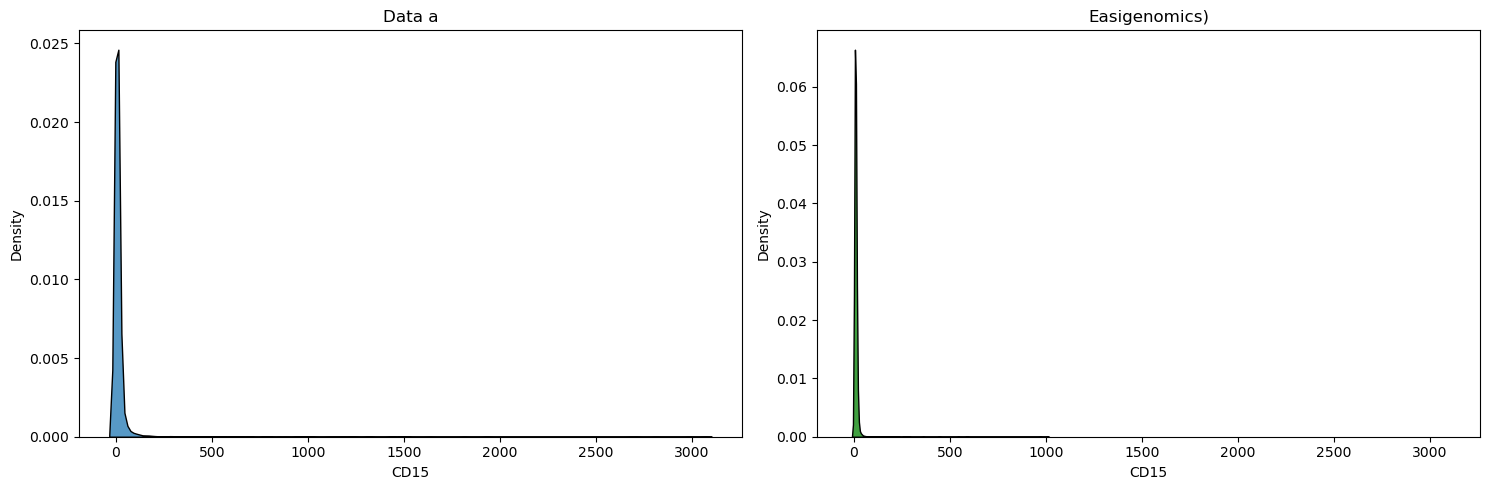

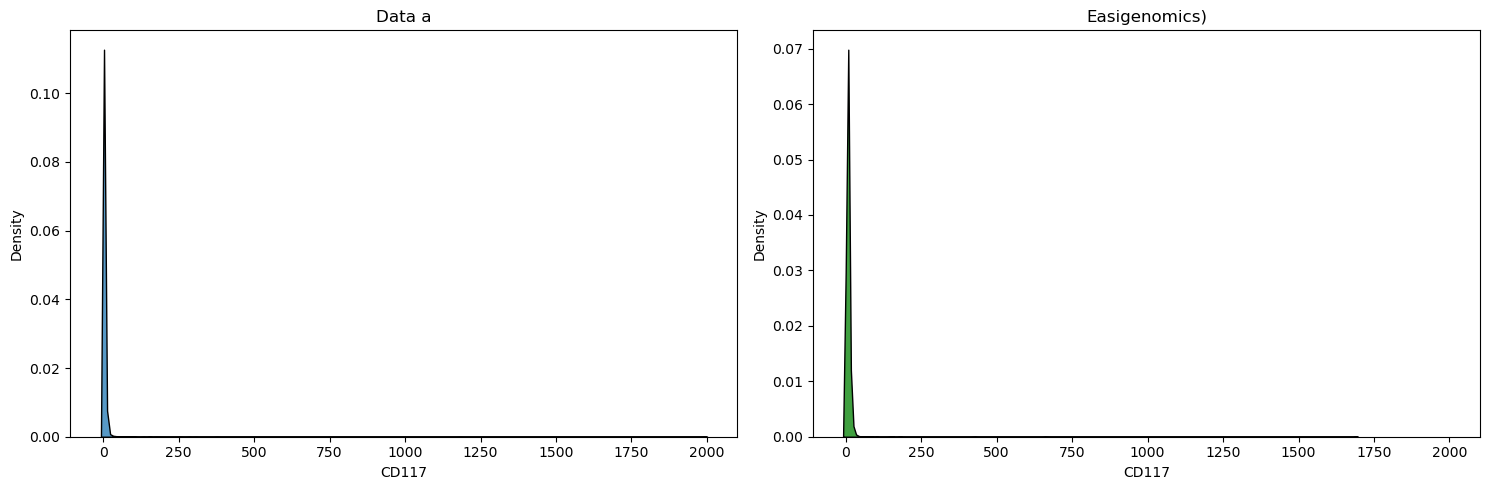

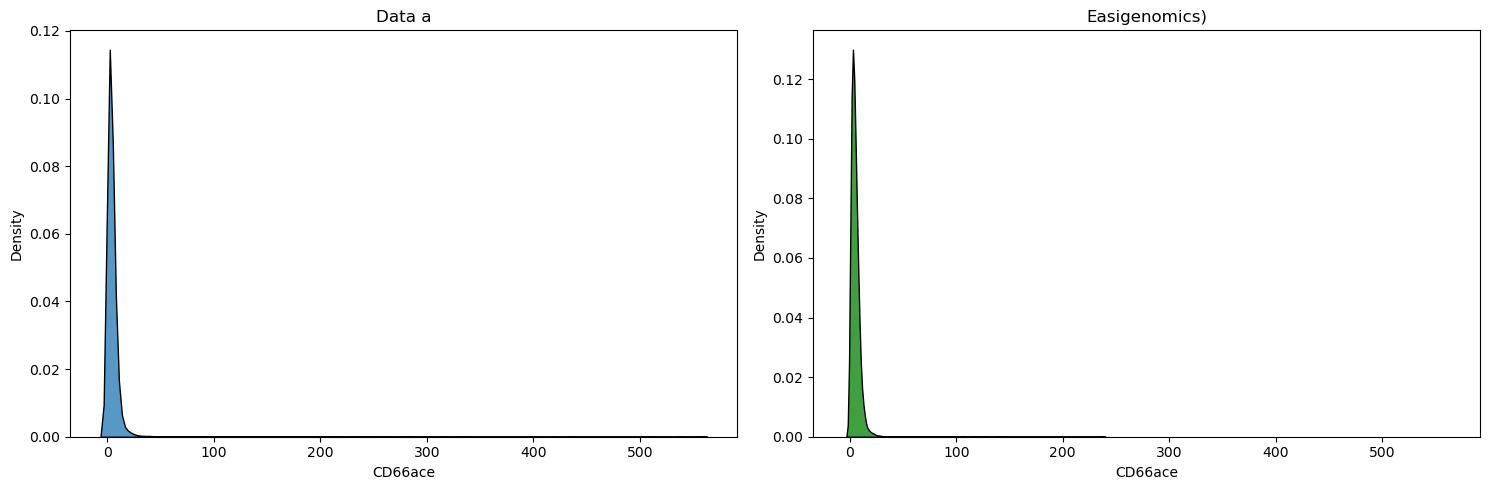

In [101]:
#all proteins

for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot_a, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=prot_easi, x=column_name, multiple="stack", color="g", ax=ax[1]) ;
   
    ax1.title.set_text('Data a')    
    ax2.title.set_text('Easigenomics)')
        
    plt.show()

In [109]:
fig = ridgeplot(
    samples=prot_a.values.T,
    bandwidth=4,
    kde_points=np.linspace(-12.5, 60, 400),
    #colorscale="viridis",
    colormode="index",
    coloralpha=0.6,
    labels=column_names,
    spacing=5 / 9,
)

# Again, update the figure layout to your liking here
fig.update_layout(
    title="data a",
    height=1000,
    width=500,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="Densities",
)
fig.show()

In [105]:
fig = ridgeplot(
    samples=prot_easi.values.T,
    bandwidth=4,
    kde_points=np.linspace(-12.5, 60, 400),
    #colorscale="viridis",
    colormode="index",
    coloralpha=0.6,
    labels=column_names,
    spacing=5 / 9,
)

# Again, update the figure layout to your liking here
fig.update_layout(
    title="Easigenomics",
    height=1000,
    width=500,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="Densities",
)
fig.show()